In [4]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
from astropy.constants import G, c
from astropy import units as u
from scipy.stats import rv_histogram

In [5]:
%load_ext autoreload
%autoreload 2

# retina quality
%config InlineBackend.figure_format = 'retina'

In [6]:
cd /Users/lambwg/Documents/Vanderbilt/Research/pop_synth//

/Users/lambwg/Documents/Vanderbilt/Research/pop_synth


In [7]:
from scripts import pop_synth

In [8]:
rc_params = {#"backend": "pdf", 
             "axes.labelsize": 10, "lines.markersize": 4,
 "font.size": 10, "xtick.top": True, "ytick.right": True,
 "xtick.major.size": 6, "xtick.minor.size": 3, "ytick.major.size": 6,
 "ytick.minor.size": 3, "xtick.major.width": 0.5, "ytick.major.width": 0.5,
 "xtick.minor.width": 0.5, "ytick.minor.width": 0.5,
 "lines.markeredgewidth": 1, "axes.linewidth": 1.2, "legend.fontsize": 7,
 "xtick.labelsize": 10, "xtick.direction": "in", "xtick.minor.visible": True,
 "xtick.major.top": True, "xtick.minor.top": True, "ytick.labelsize": 10,
 "ytick.direction": "in", "ytick.minor.visible": True,
 "ytick.major.right": True, "ytick.minor.right": True, "savefig.dpi": 400,
 "path.simplify": True, "font.family": "serif", "font.serif": "Times",
 "text.usetex": True, "figure.figsize": [3.5503666805036667,
                                         2.1942472810764047]}

In [9]:
plt.rcParams.update(rc_params)

In [10]:
plt.rcParams['backend']

'module://matplotlib_inline.backend_inline'

# Variation relations

In [5]:
## Make a binary distribution function going as f^{-8/3}

A = 1e-22 # arbitrary
f = np.linspace(1e-9,1e-7,int(1e6)) # frequncy grid
fbmid = 0.5 * (f[1:] + f[:-1]) # middle of grid cells
Nf = A * fbmid**(-8./3.) # dt / d(lnf) for GW emission

Text(0.5, 0, '$GW frequency (Hz)')

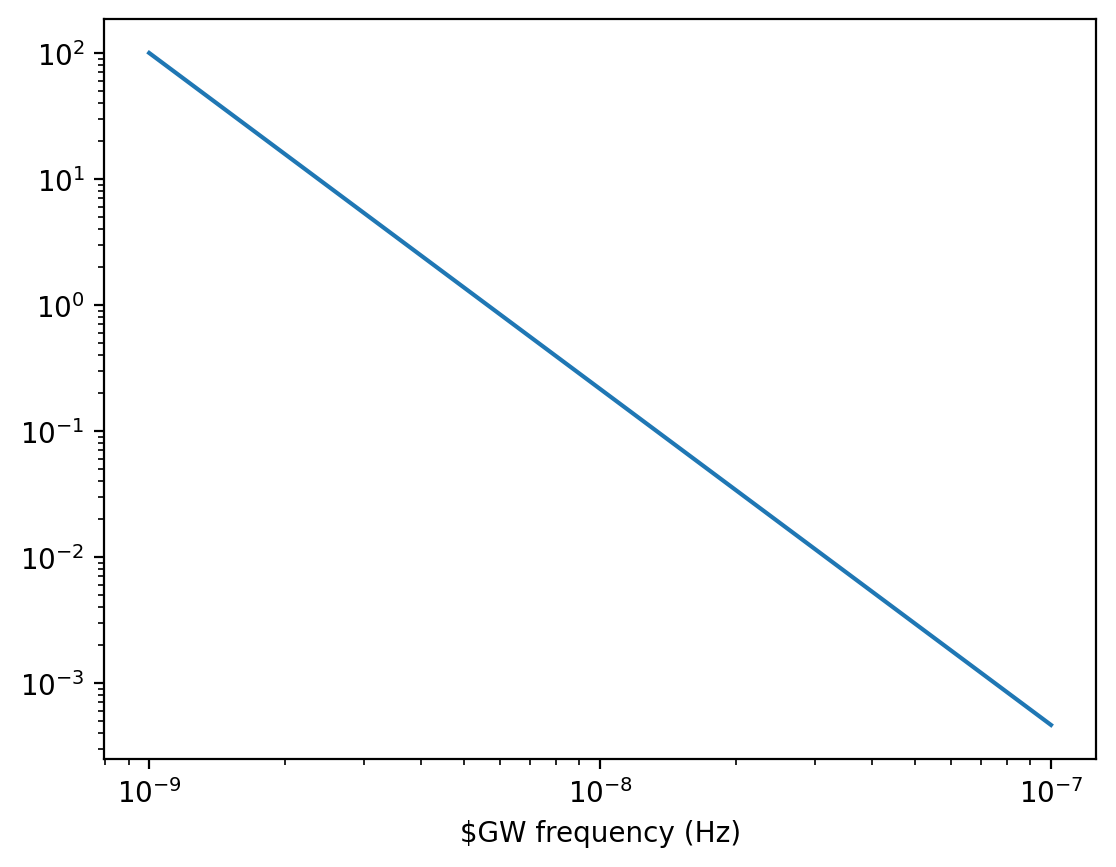

In [6]:
plt.loglog(fbmid, Nf)
plt.xlabel(r'$GW frequency (Hz)')

In [7]:
test = ss.rv_histogram((Nf,f)) # make a scipy.stats object

In [172]:
## Create structures for Omega_gw across realizations

bins = np.arange(1, 30) / 365.25 / 86400.0 / 20.0 # 20-year bins
bmid = 0.5 * (bins[1:] + bins[:-1]) # bin mids

omega = np.zeros((bmid.shape[0], int(1e4))) # frequency-bins x realizations

In [173]:
# Make Omega_gw spectrum for each realization

for jj in range(omega.shape[1]):

  freqs = test.rvs(size=int(1e4))
  mask = np.digitize(freqs, bins) - 1

  for ii, bin in enumerate(bmid):
    omega[ii, jj] = np.sum(freqs[mask==ii]**(10./3.))

The variance of the following quantities can be deduced analytically.

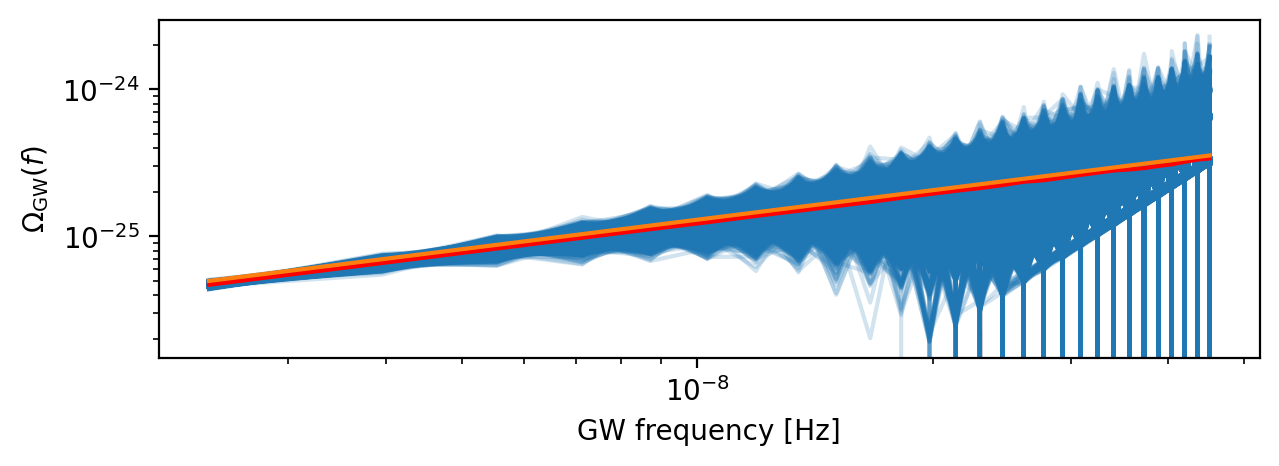

In [174]:
# Plot h_c for all realizations
fyr = 1 / 365.25 / 86400.0

for jj in range(omega.shape[1]):
  plt.loglog(bmid, omega[:, jj], alpha=0.2, color='C0')
plt.loglog(bmid, np.mean(omega, axis=1), color='r')
plt.loglog(bmid, 2.8e-25 * (bmid/fyr)**(+2/3.), color='C1')

plt.xlabel('GW frequency [Hz]');
plt.ylabel(r'$\Omega_\mathrm{GW}(f)$');

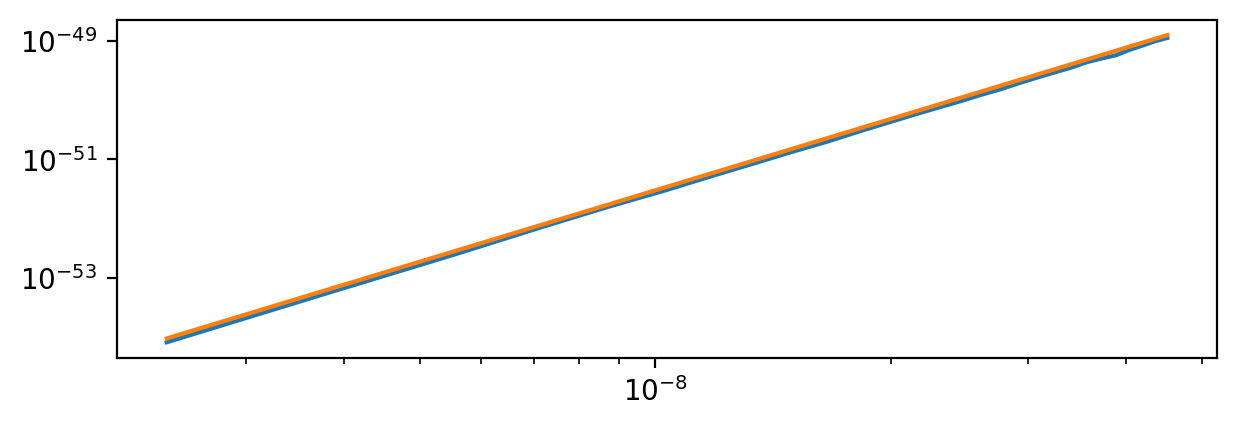

In [175]:
## Variance of Omega_gw

plt.loglog(bmid, np.var(omega, axis=1))
plt.loglog(bmid, 3e-20*bmid**(4.))

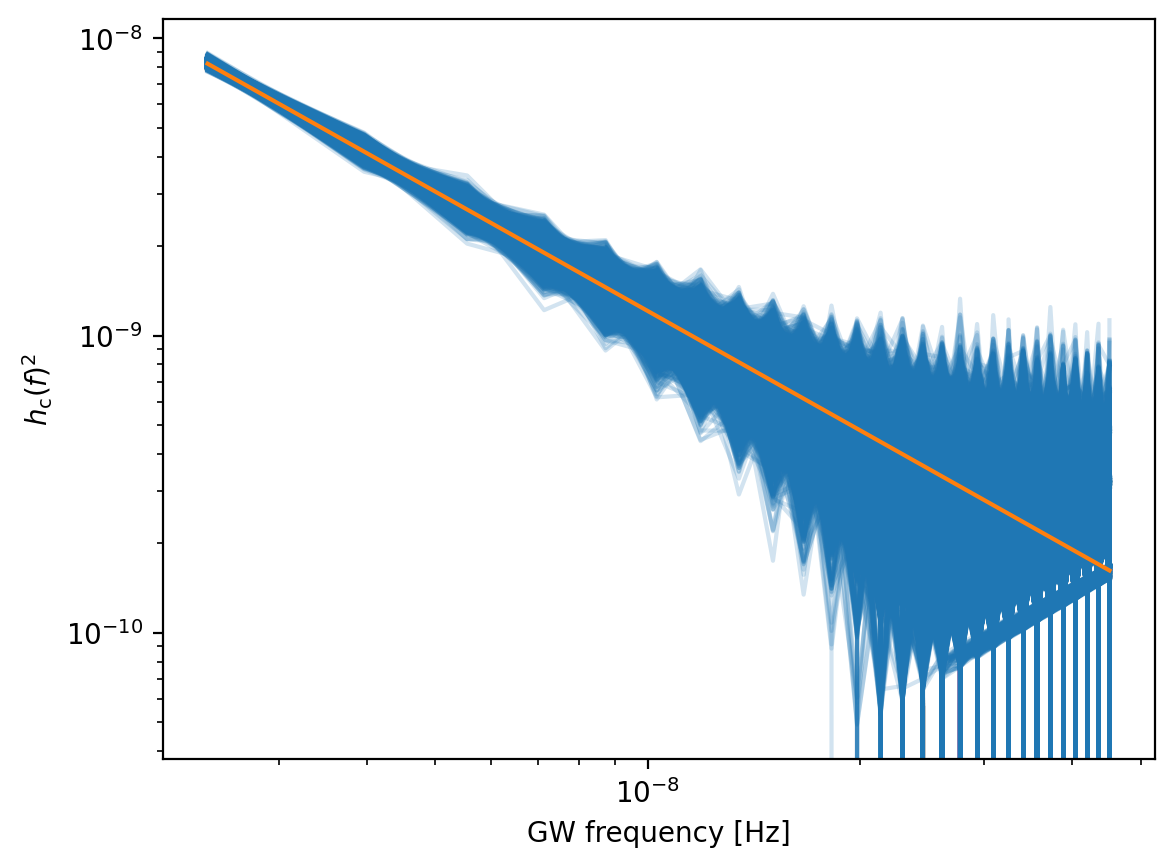

In [12]:
# Plot h_c for all realizations
fyr = 1 / 365.25 / 86400.0

for jj in range(omega.shape[1]):
  plt.loglog(bmid, omega[:, jj]/bmid**2, alpha=0.2, color='C0')
plt.loglog(bmid, 2.6e-10 * (bmid/fyr)**(-4/3.), color='C1')

plt.xlabel('GW frequency [Hz]');
plt.ylabel(r'$h_\mathrm{c}(f)^2$');

Text(0, 0.5, 'Var($h_\\mathrm{c}(f)^2$)')

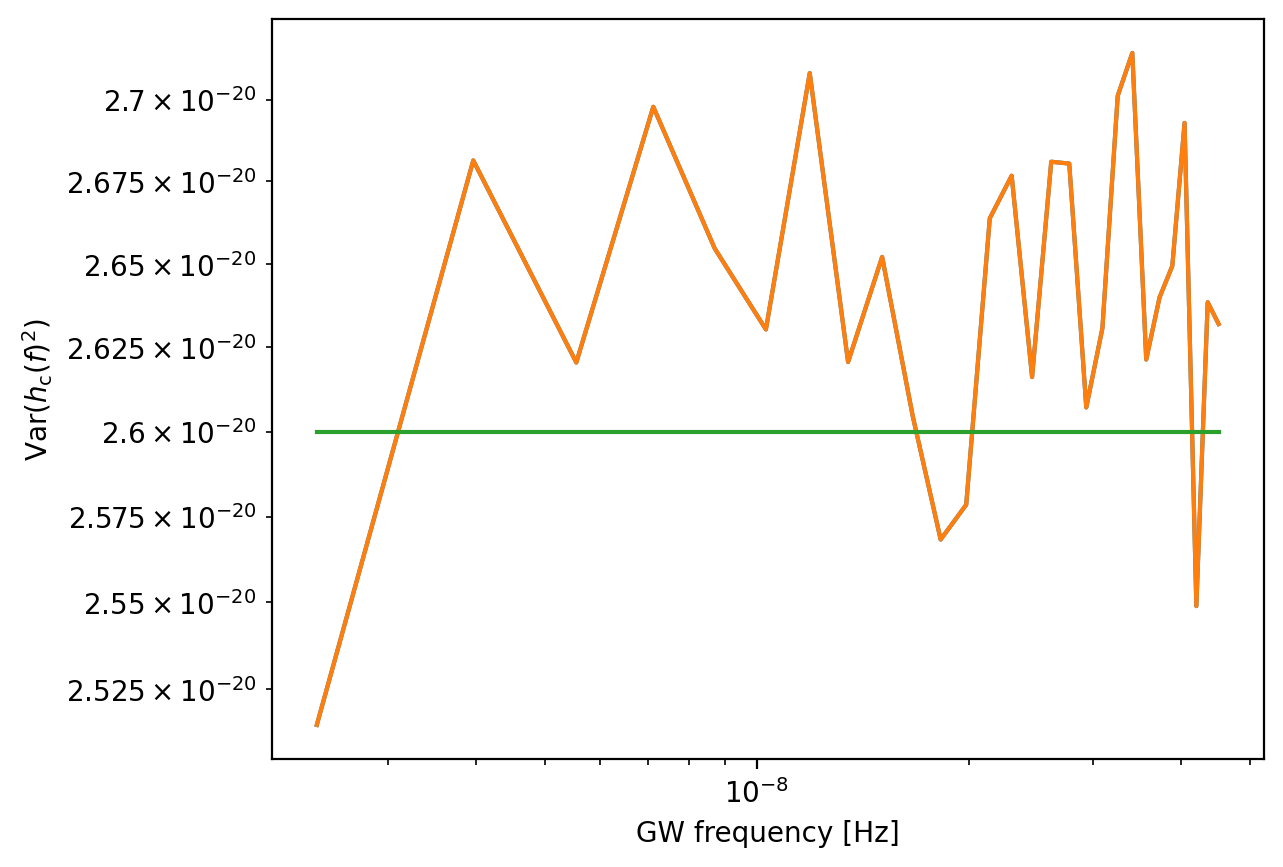

In [13]:
# variance of hc^2

#plt.loglog(bmid, np.var(omega, axis=1) / bmid**2)
plt.loglog(bmid, np.var(omega, axis=1) / bmid**4)
plt.loglog(bmid, np.var(omega/bmid[:, None]**2, axis=1))
#plt.loglog(bmid, 1e-3*bmid**(2.))
#plt.loglog(bmid, 5e-20*bmid**(2.))
plt.loglog(bmid, 2.6e-20*np.ones_like(bmid))
plt.xlabel('GW frequency [Hz]')
plt.ylabel(r'Var($h_\mathrm{c}(f)^2$)')

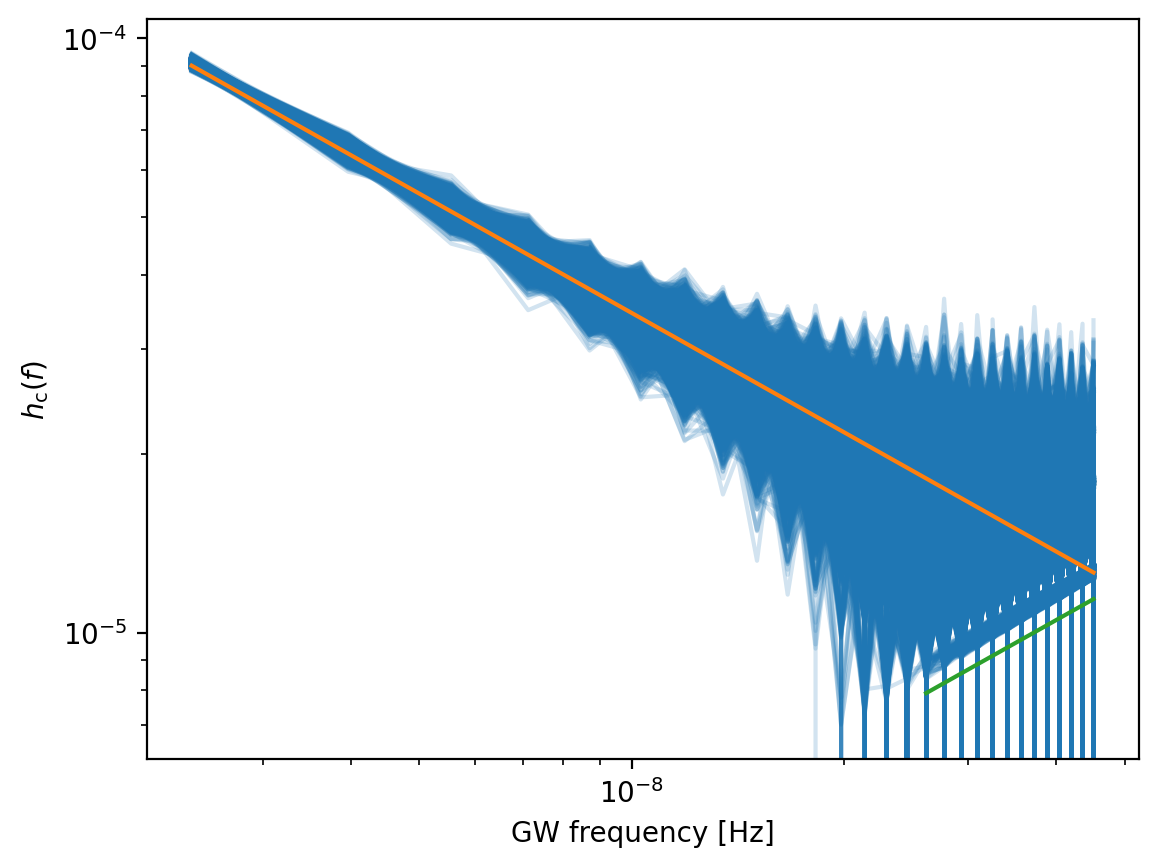

In [14]:
# Plot h_c for all realizations
fyr = 1 / 365.25 / 86400.0

for jj in range(omega.shape[1]):
  plt.loglog(bmid, np.sqrt(omega[:, jj]/bmid**2), alpha=0.2, color='C0')
plt.loglog(bmid, 1.6e-5 * (bmid/fyr)**(-2/3.), color='C1')
plt.loglog(bmid[15:], 9.e-6 * (bmid[15:]/fyr)**(+2/3.), color='C2')

plt.xlabel('GW frequency [Hz]');
plt.ylabel(r'$h_\mathrm{c}(f)$');

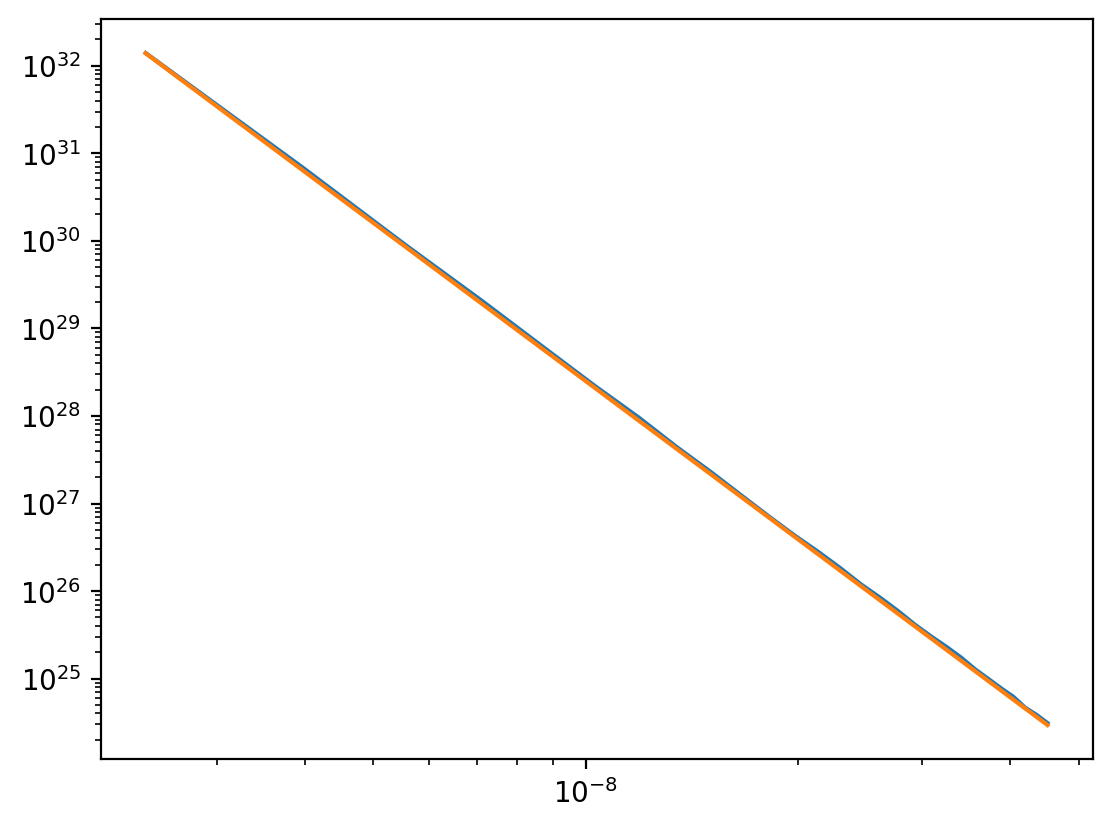

In [15]:
# variance of PSD

#plt.loglog(bmid, np.var(omega, axis=1) / bmid**2. / bmid**3)
#plt.loglog(bmid, 2e-20*bmid**(-1.))

plt.loglog(bmid, np.var(omega/bmid[:, None]**5, axis=1))
plt.loglog(bmid, 2.5e-20*bmid**-6)

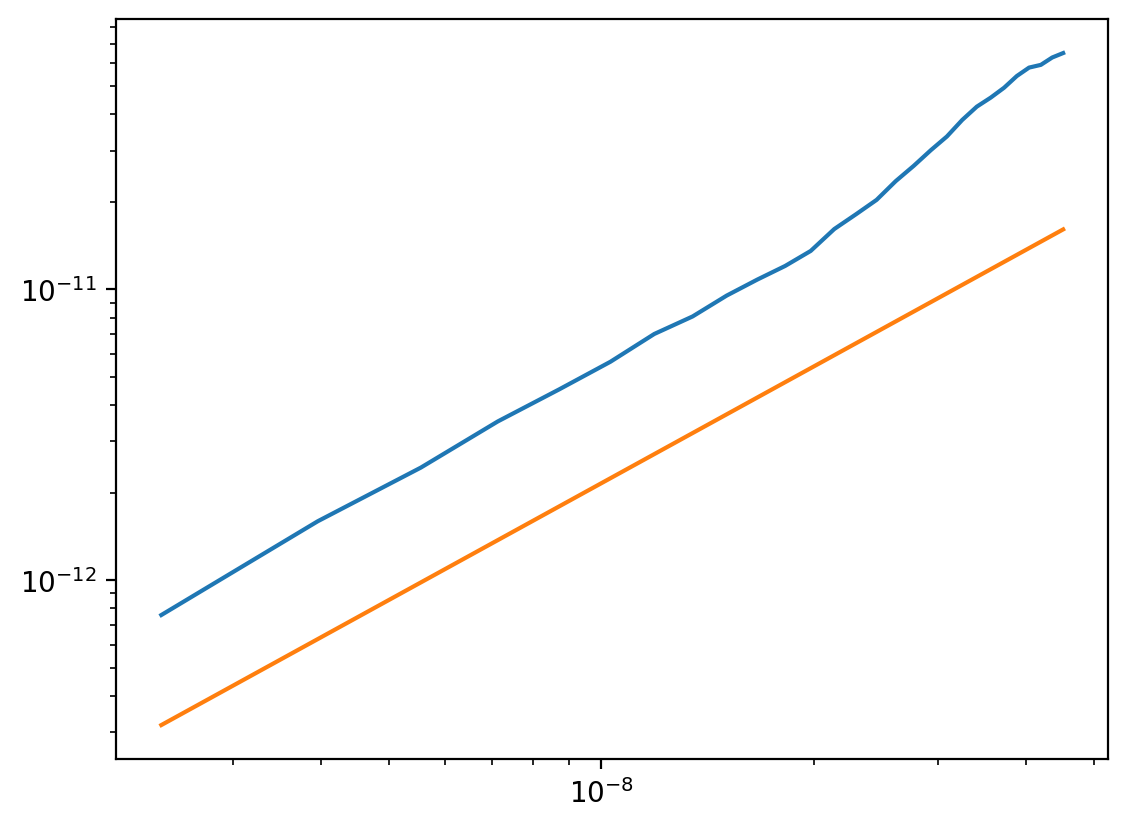

In [16]:
# variance of h_c

plt.loglog(bmid, np.var(np.sqrt(omega/bmid[:, None]**2), axis=1))
plt.loglog(bmid, 1e-1*bmid**(4./3.))

/var/folders/n5/tlyhfd1j5s7gm9fxj02byc0c0000gn/T/ipykernel_38210/2980543157.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.loglog(bmid, np.var(0.5*np.log10(omega / bmid[:, None]**5.), axis=1))
/Users/lambwg/Applications/miniconda3/envs/ceffyl/lib/python3.10/site-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


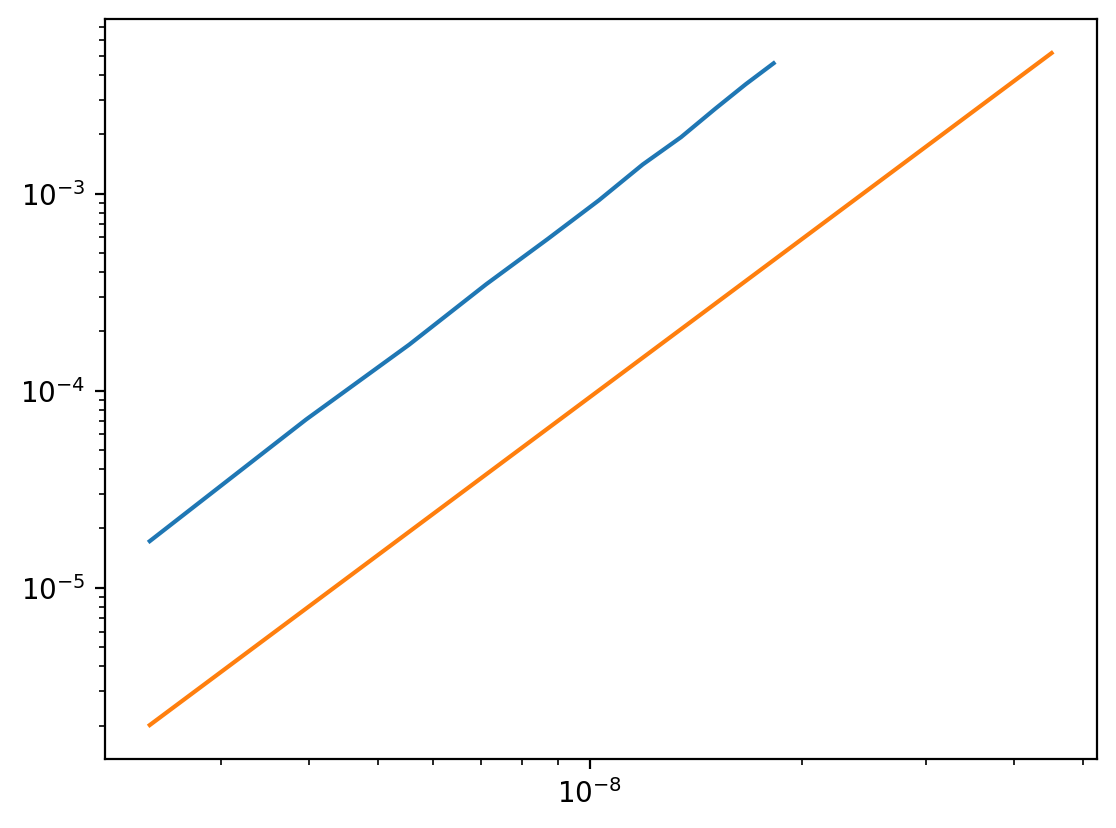

In [17]:
# variance of 0.5*log10(rho^2)
plt.loglog(bmid, np.var(0.5*np.log10(omega / bmid[:, None]**5.), axis=1))
plt.loglog(bmid, 2e17*bmid**(8./3.))

## test adding different combinations of population amplitudes

In [20]:
# Make Omega_gw spectrum for each realization
f = np.linspace(1e-9,1e-7,int(1e6)) # frequncy grid
fbmid = 0.5 * (f[1:] + f[:-1]) # middle of grid cells

A = 1e-22 # arbitrary
Nf = A * fbmid**(-8./3.) # dt / d(lnf) for GW emission

test = ss.rv_histogram((Nf,f)) # make a scipy.stats object

## Create structures for Omega_gw across realizations
bins = np.arange(1, 30) / 365.25 / 86400.0 / 20.0 # 20-year bins
bmid = 0.5 * (bins[1:] + bins[:-1]) # bin mids

omega = np.zeros((bmid.shape[0], int(1e4))) # frequency-bins x realizations
omega2 = np.zeros((bmid.shape[0], int(1e4))) # frequency-bins x realizations

for jj in range(omega.shape[1]):

  freqs = test.rvs(size=int(1e4))
  mask = np.digitize(freqs, bins) - 1

  for ii, bin in enumerate(bmid):
    omega[ii, jj] = np.sum(freqs[mask==ii]**(10./3.))

  freqs2 = test.rvs(size=int(1e3))
  mask = np.digitize(freqs2, bins) - 1

  for ii, bin in enumerate(bmid):
    omega2[ii, jj] = np.sum(10 * freqs2[mask==ii]**(10./3.))

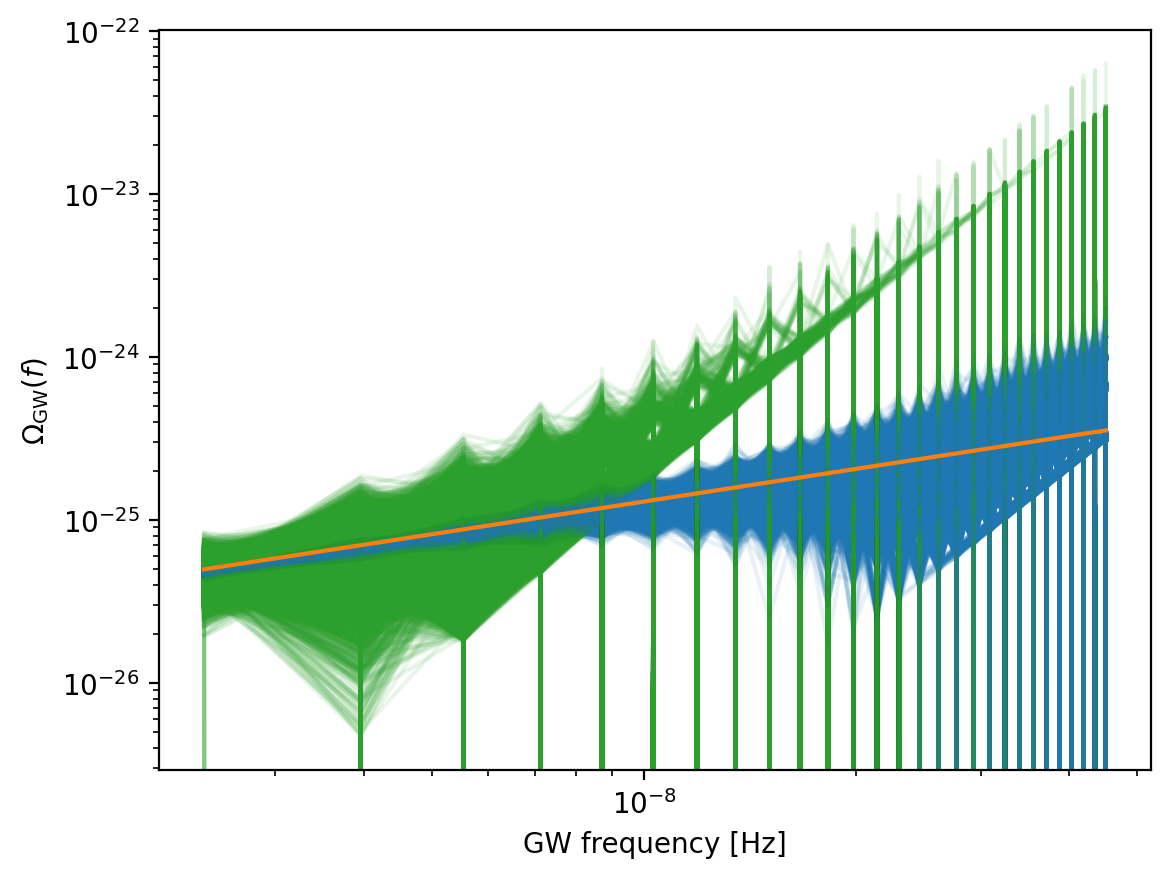

In [21]:
# Plot h_c for all realizations
fyr = 1 / 365.25 / 86400.0

for jj in range(omega.shape[1]):
  plt.loglog(bmid, omega[:, jj], alpha=0.1, color='C0')
  plt.loglog(bmid, omega2[:, jj], alpha=0.1, color='C2')
plt.loglog(bmid, 2.8e-25 * (bmid/fyr)**(+2/3.), color='C1')

plt.xlabel('GW frequency [Hz]');
plt.ylabel(r'$\Omega_\mathrm{GW}(f)$');

In [25]:
# Make Omega_gw spectrum for each realization
f = np.linspace(1e-9,1e-7,int(1e6)) # frequncy grid
fbmid = 0.5 * (f[1:] + f[:-1]) # middle of grid cells

A = 1e-22 # arbitrary
Nf = A * fbmid**(-8./3.) # dt / d(lnf) for GW emission

test = ss.rv_histogram((Nf,f)) # make a scipy.stats object

## Create structures for Omega_gw across realizations
bins = np.arange(1, 30) / 365.25 / 86400.0 / 20.0 # 20-year bins
bmid = 0.5 * (bins[1:] + bins[:-1]) # bin mids

omega = np.zeros((bmid.shape[0], int(1e4))) # frequency-bins x realizations

for jj in range(omega.shape[1]):

  freqs = test.rvs(size=int(1e4))
  mask = np.digitize(freqs, bins) - 1

  for ii, bin in enumerate(bmid):
    omega[ii, jj] = np.sum(freqs[mask==ii]**(10./3.))

  freqs = test.rvs(size=int(1e2))
  mask = np.digitize(freqs, bins) - 1

  for ii, bin in enumerate(bmid):
    omega[ii, jj] = np.sum(100 * freqs[mask==ii]**(10./3.))

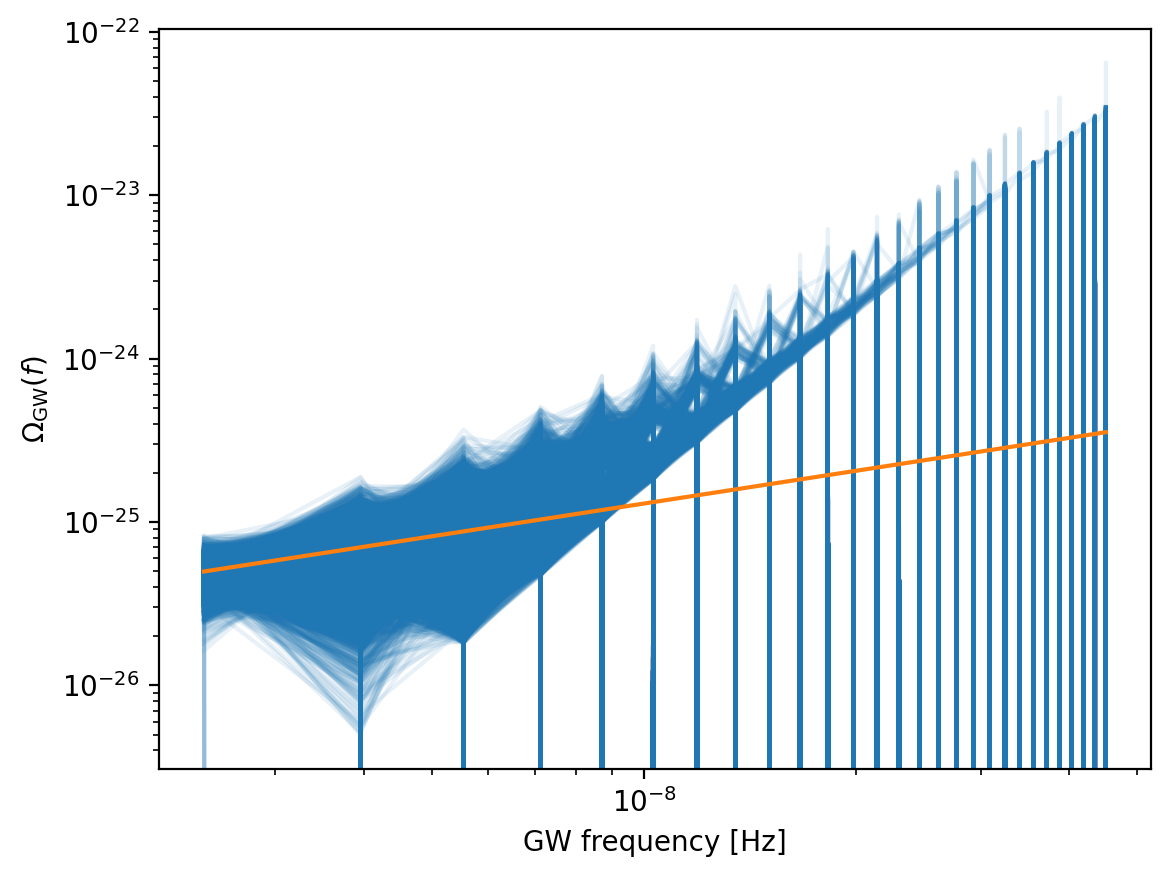

In [26]:
# Plot h_c for all realizations
fyr = 1 / 365.25 / 86400.0

for jj in range(omega.shape[1]):
  plt.loglog(bmid, omega[:, jj], alpha=0.1, color='C0')
plt.loglog(bmid, 2.8e-25 * (bmid/fyr)**(+2/3.), color='C1')

plt.xlabel('GW frequency [Hz]');
plt.ylabel(r'$\Omega_\mathrm{GW}(f)$');

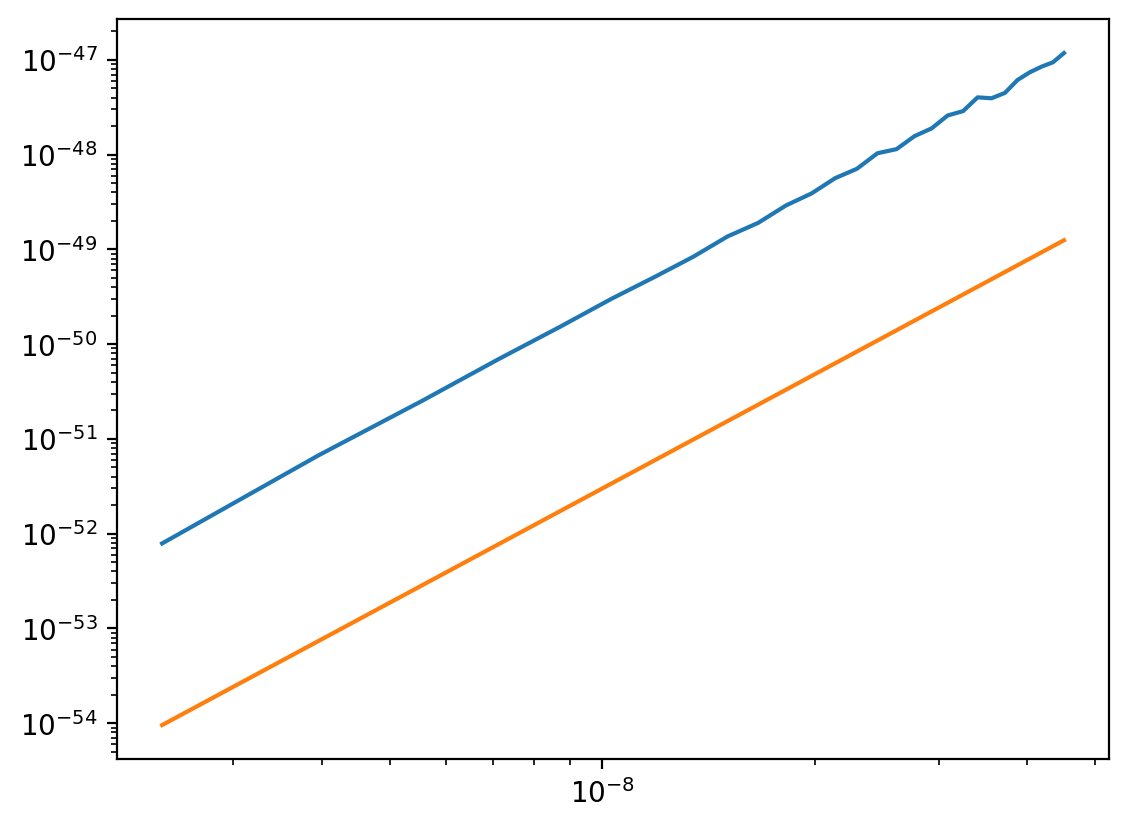

In [27]:
## Variance of Omega_gw
plt.loglog(bmid, np.var(omega, axis=1))
plt.loglog(bmid, 3e-20*bmid**(4.))

# For a general $dt/df$...

Let $\frac{dt}{df} \propto f^\lambda$

For stellar scattering, $\lambda = -7/3$

In [472]:
## Make a binary distribution function going as f^lambda

A = 1e-22 # arbitrary
f = np.linspace(1e-9,1e-7,int(1e6)) # frequncy grid
fbmid = 0.5 * (f[1:] + f[:-1]) # middle of grid cells

lamb_da = -7/3  # stellar scattering
Nf = A * fbmid**(lamb_da + 1) # dt / d(lnf) for GW emission = f * dt/df

Text(0, 0.5, '$A\\ dt/d\\ln{f}$')

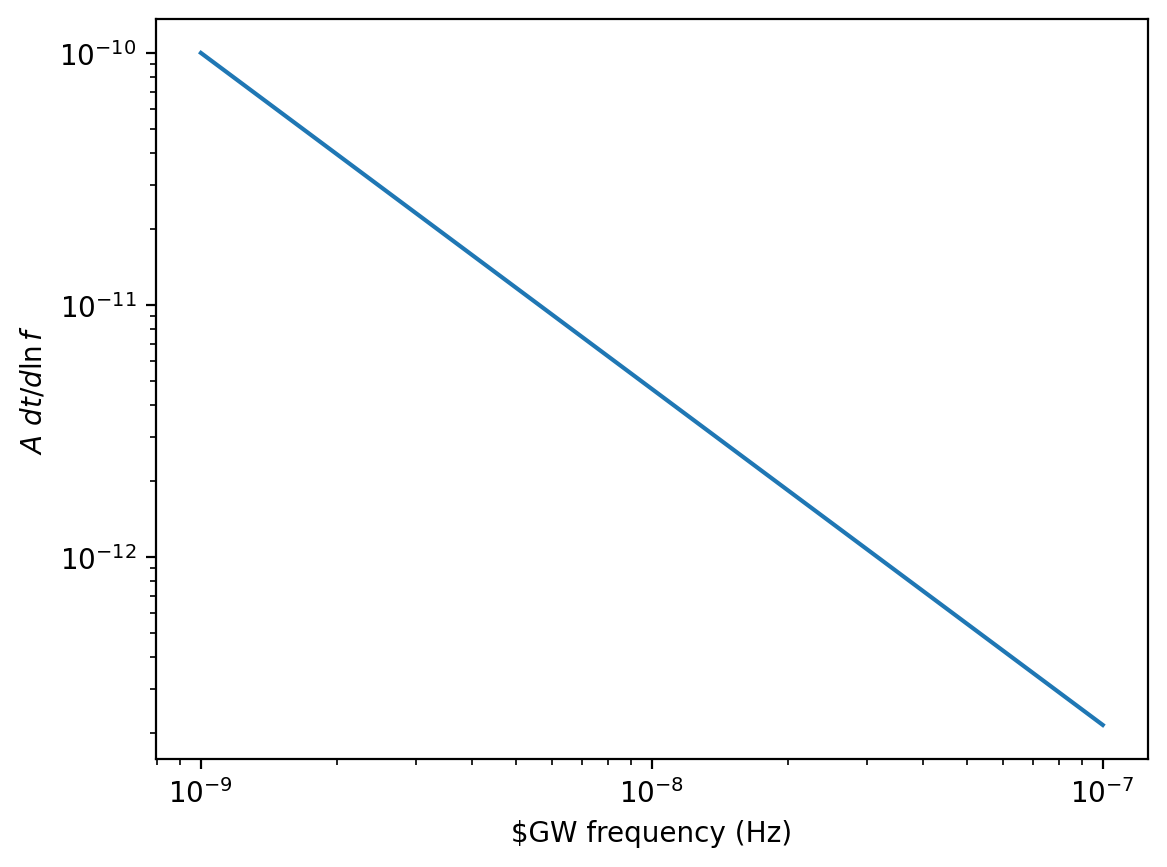

In [473]:
plt.loglog(fbmid, Nf)
plt.xlabel(r'$GW frequency (Hz)')
plt.ylabel(r'$A\ dt/d\ln{f}$')

In [474]:
test = ss.rv_histogram((Nf,f)) # make a scipy.stats object

In [475]:
## Create structures for Omega_gw across realizations

bins = np.arange(1, 30) / 365.25 / 86400.0 / 20.0 # 20-year bins
bmid = 0.5 * (bins[1:] + bins[:-1]) # bin mids

omega = np.zeros((bmid.shape[0], int(1e4))) # frequency-bins x realizations

In [476]:
# Make Omega_gw spectrum for each realization

for jj in range(omega.shape[1]):

  freqs = test.rvs(size=int(1e4))
  mask = np.digitize(freqs, bins) - 1

  for ii, bin in enumerate(bmid):
    omega[ii, jj] = np.sum(freqs[mask==ii]**(10./3.))   # ~ SUM dE/dt * dt/dlnf

$$\Omega(f) \propto f^{\lambda + 13/3}$$

$$\mathrm{Var}(\Omega(f)) \propto f^{\lambda + 23/3}$$

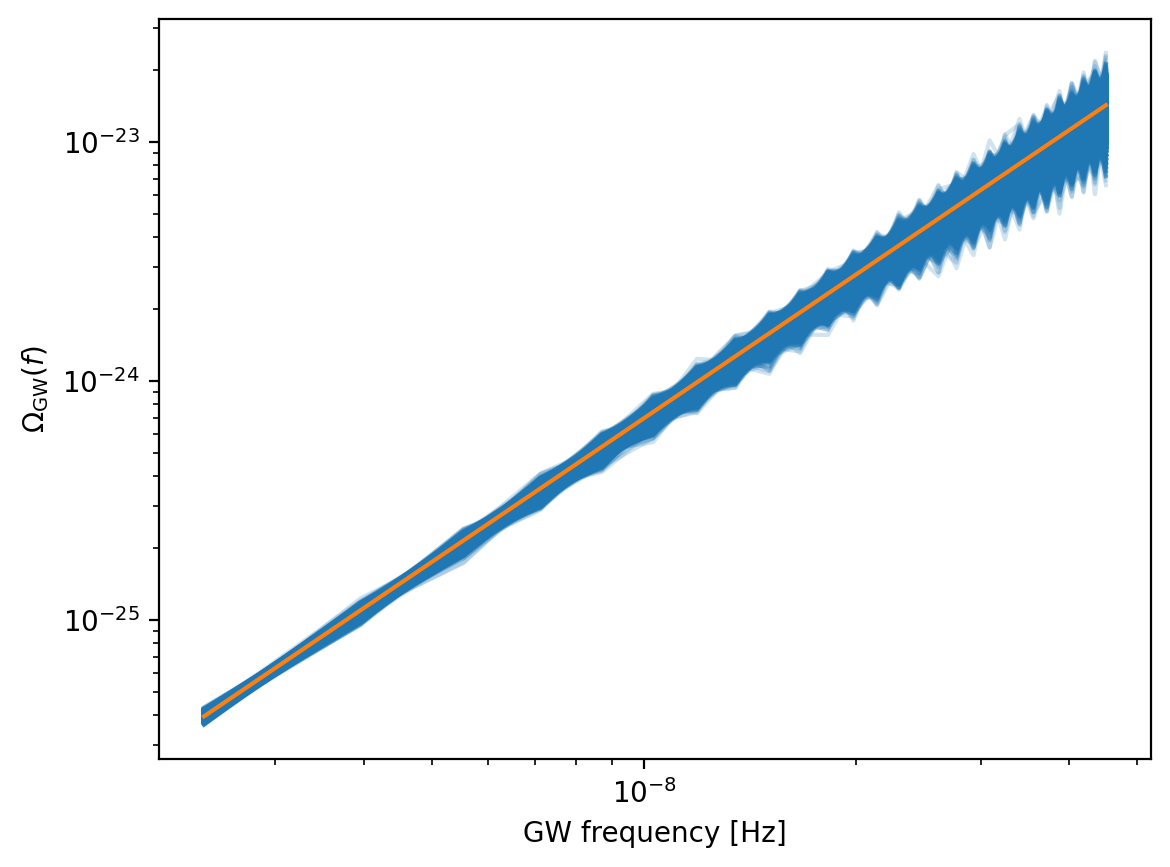

In [477]:
# Plot omega for all realizations
fyr = 1 / 365.25 / 86400.0

for jj in range(omega.shape[1]):
  plt.loglog(bmid, omega[:, jj], alpha=0.2, color='C0')
plt.loglog(bmid, 7e-24 * (bmid/fyr)**(lamb_da + 13/3), color='C1')

plt.xlabel('GW frequency [Hz]');
plt.ylabel(r'$\Omega_\mathrm{GW}(f)$');

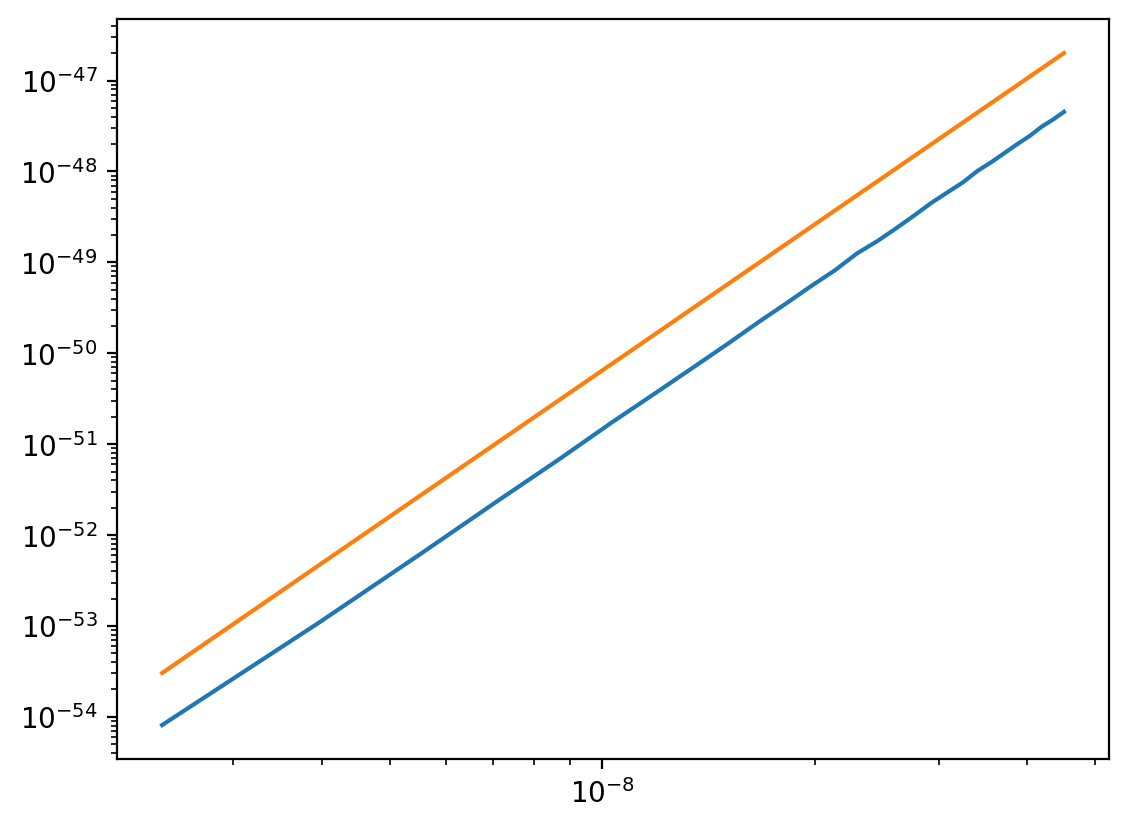

In [478]:
## Variance of Omega_gw
plt.loglog(bmid, np.var(omega, axis=1))
plt.loglog(bmid, 3e-8*bmid**(lamb_da + 23/3.))


$$h_\mathrm{c}^2(f) \propto f^{\lambda + 7/3}$$

$$\mathrm{Var}(h_\mathrm{c}^2(f) ) \propto f^{\lambda + 11/3}$$

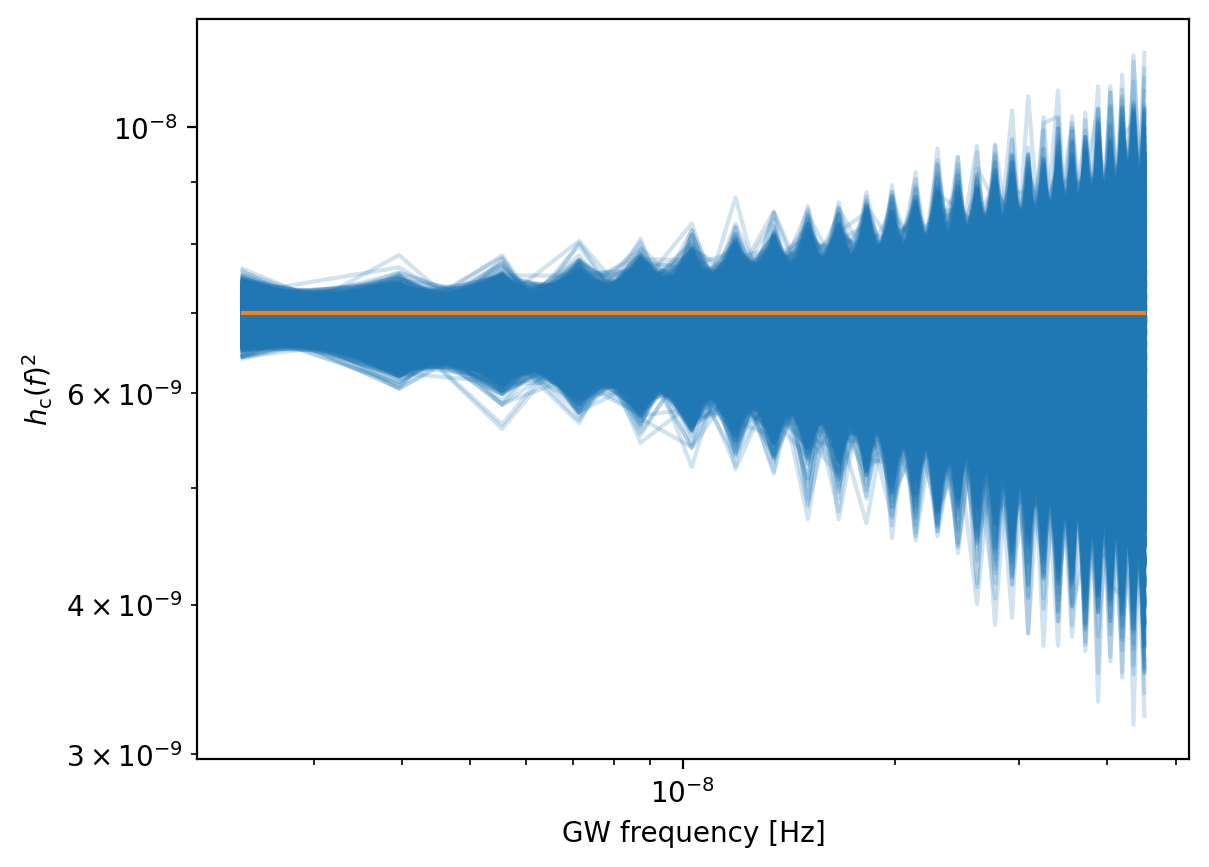

In [479]:
# Plot h_c for all realizations
fyr = 1 / 365.25 / 86400.0

for jj in range(omega.shape[1]):
  plt.loglog(bmid, omega[:, jj]/bmid**2, alpha=0.2, color='C0')
plt.loglog(bmid, 7e-9 * (bmid/fyr)**(lamb_da + 7/3.), color='C1')

plt.xlabel('GW frequency [Hz]');
plt.ylabel(r'$h_\mathrm{c}(f)^2$');

Text(0, 0.5, 'Var($h_\\mathrm{c}(f)^2$)')

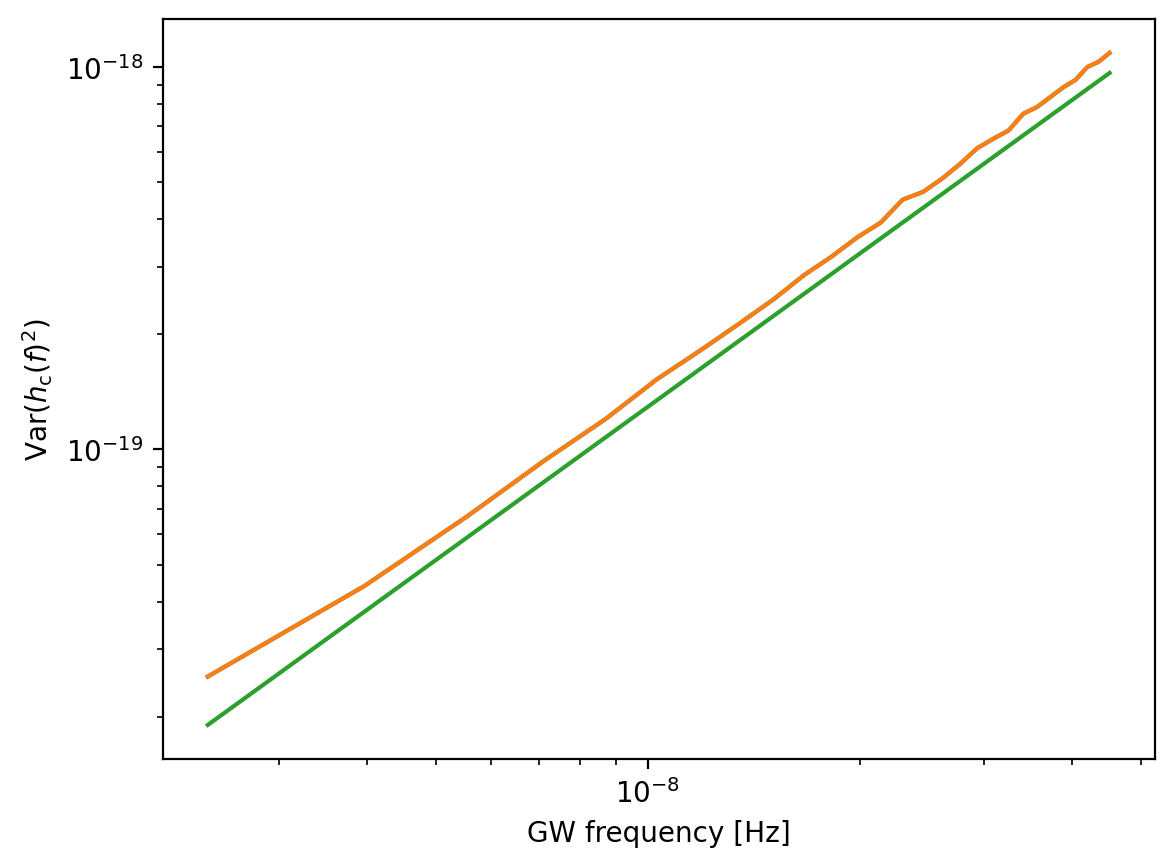

In [480]:
# variance of hc^2

#plt.loglog(bmid, np.var(omega, axis=1) / bmid**2)
plt.loglog(bmid, np.var(omega, axis=1) / bmid**4)
plt.loglog(bmid, np.var(omega/bmid[:, None]**2, axis=1))
#plt.loglog(bmid, 1e-3*bmid**(2.))
#plt.loglog(bmid, 5e-20*bmid**(2.))
plt.loglog(bmid, 6.e-9*bmid**(lamb_da + 11/3))
plt.xlabel('GW frequency [Hz]')
plt.ylabel(r'Var($h_\mathrm{c}(f)^2$)')

$$h_\mathrm{c}(f) \propto f^{(\lambda + 7/3)/2}$$

$$\mathrm{Var}(h_\mathrm{c}(f) ) \propto f^{4/3}$$

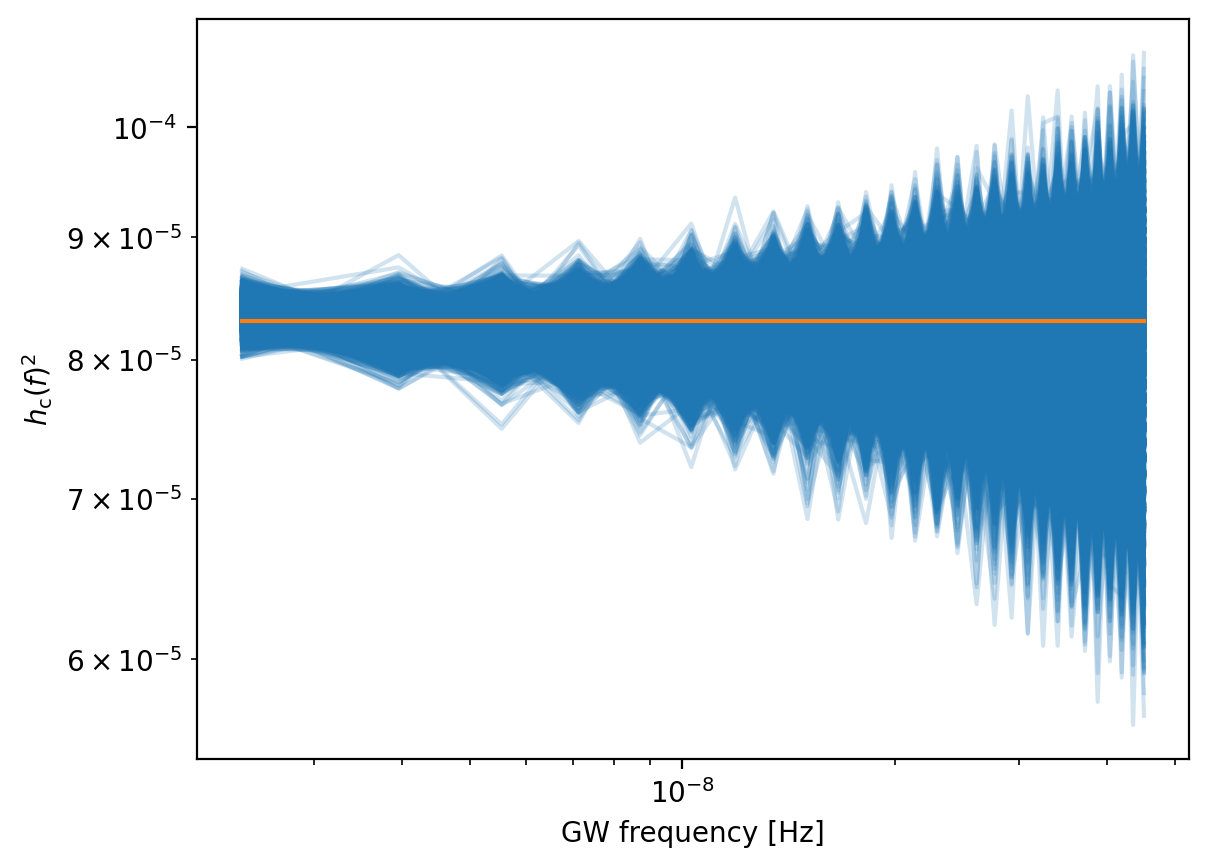

In [481]:
# Plot h_c for all realizations
fyr = 1 / 365.25 / 86400.0

for jj in range(omega.shape[1]):
  plt.loglog(bmid, np.sqrt(omega[:, jj]/bmid**2), alpha=0.2, color='C0')
plt.loglog(bmid, 8.3e-5 * (bmid/fyr)**((lamb_da + 7/3.)/2), color='C1')

plt.xlabel('GW frequency [Hz]');
plt.ylabel(r'$h_\mathrm{c}(f)^2$');

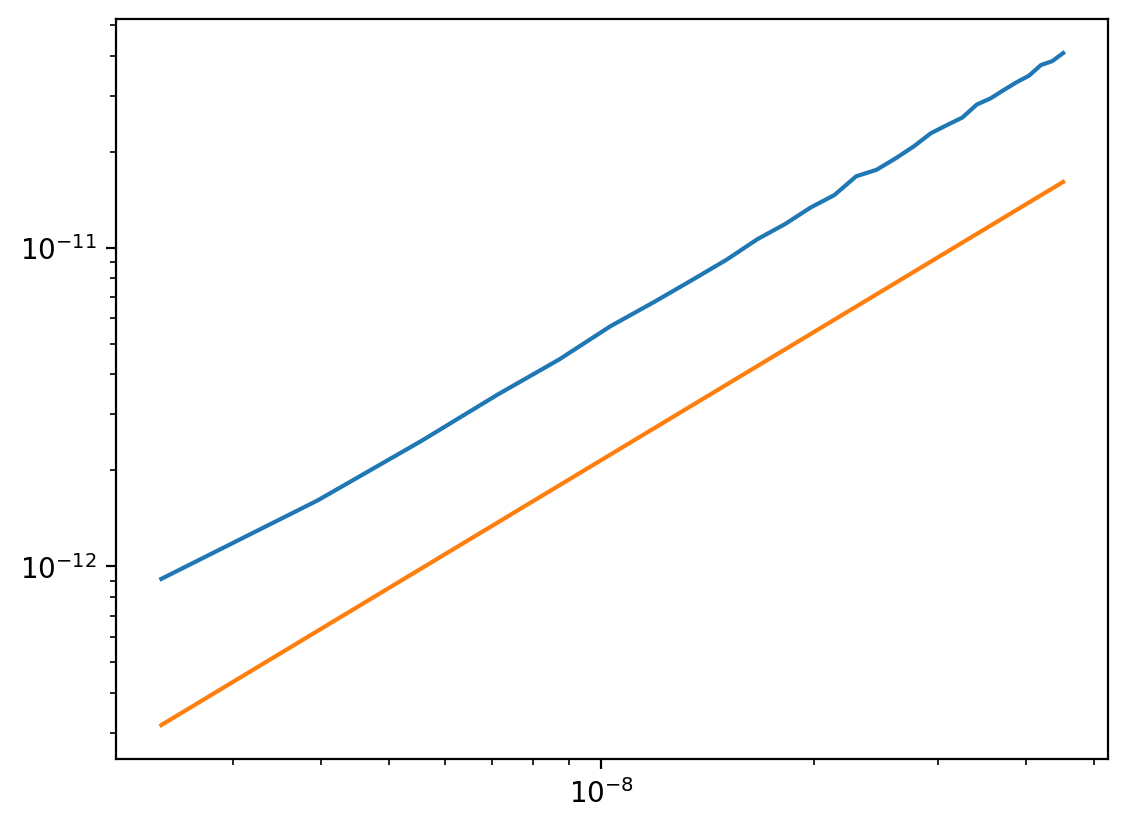

In [482]:
# variance of h_c
plt.loglog(bmid, np.var(np.sqrt(omega/bmid[:, None]**2), axis=1))
plt.loglog(bmid, 1e-1*bmid**(4./3.))

$$\rho^2(f) \propto f^{\lambda - 2/3}$$

$$\mathrm{Var}(\rho^2(f) ) \propto f^{\lambda - 7/3}$$

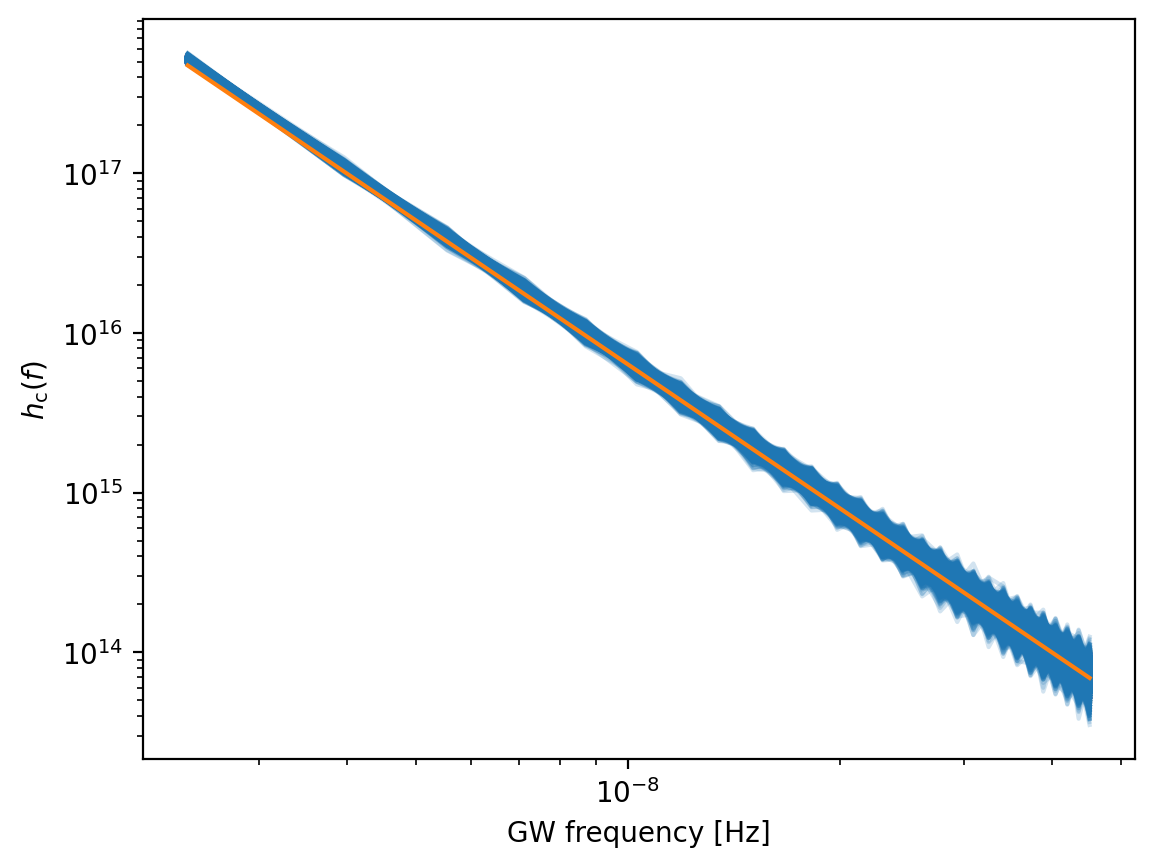

In [483]:
# Plot psd for all realizations
fyr = 1 / 365.25 / 86400.0

for jj in range(omega.shape[1]):
  plt.loglog(bmid, omega[:, jj]/bmid**5, alpha=0.2, color='C0')
plt.loglog(bmid, 2e14 * (bmid/fyr)**(lamb_da-2/3.), color='C1')

plt.xlabel('GW frequency [Hz]');
plt.ylabel(r'$h_\mathrm{c}(f)$');

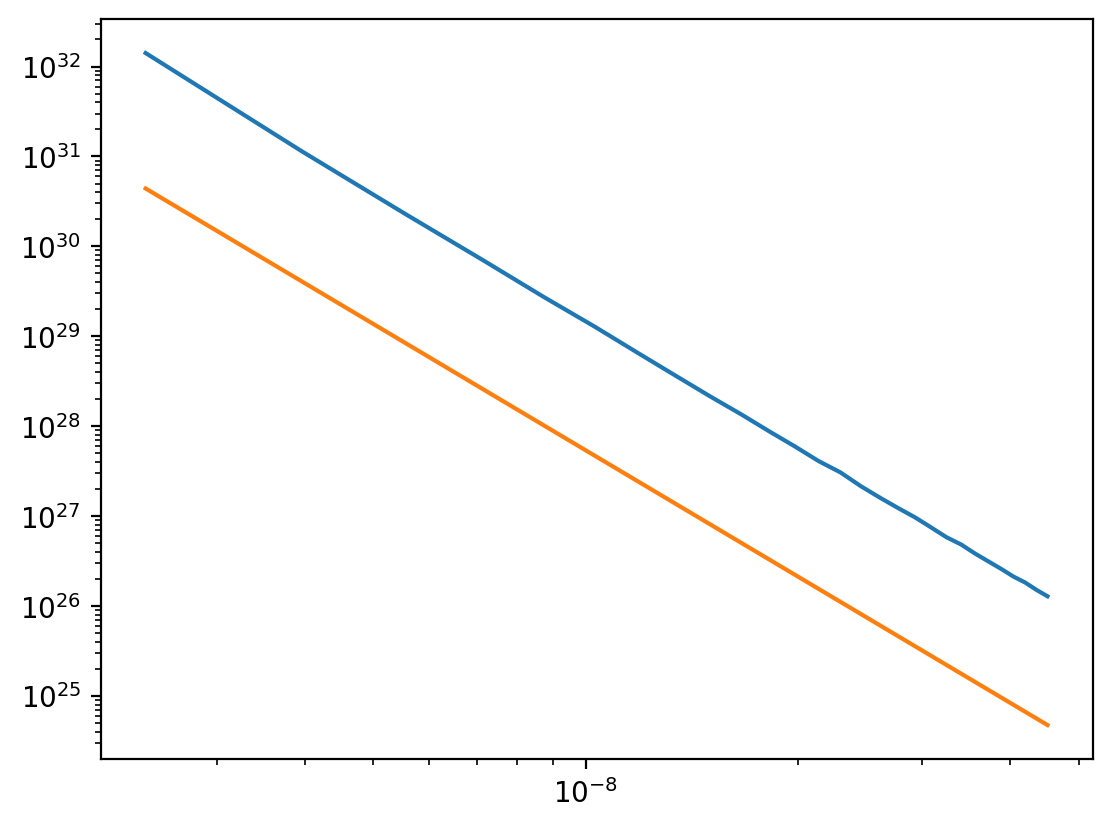

In [484]:
# variance of PSD

#plt.loglog(bmid, np.var(omega, axis=1) / bmid**2. / bmid**3)
#plt.loglog(bmid, 2e-20*bmid**(-1.))

plt.loglog(bmid, np.var(omega/bmid[:, None]**5, axis=1))
plt.loglog(bmid, 2.5e-10*bmid**(lamb_da-7/3))

$$\log(\rho(f)) \propto \log(f^{(\lambda - 2/3)/2})$$

$$\mathrm{Var}(\rho(f)) \propto \log(f^{-(\lambda + 1)})$$

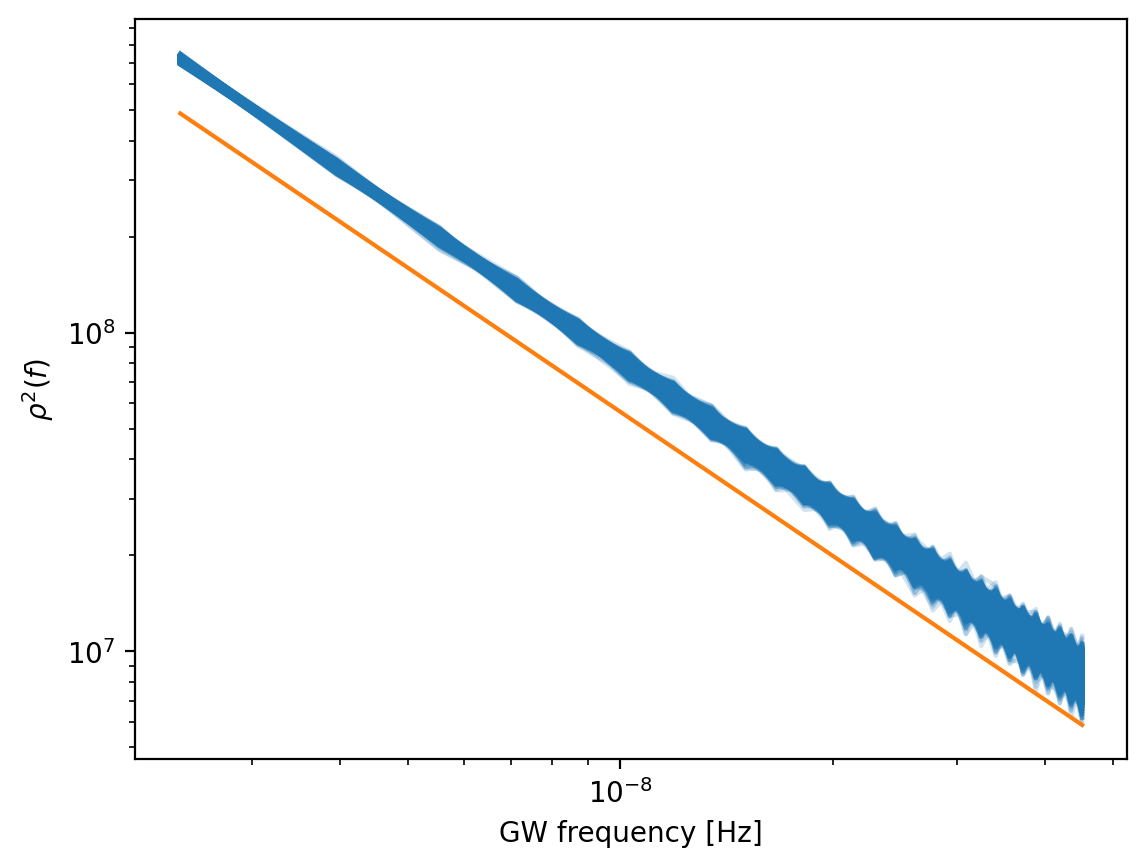

In [485]:
# Plot psd for all realizations
fyr = 1 / 365.25 / 86400.0

for jj in range(omega.shape[1]):
  plt.loglog(bmid, (omega[:, jj]/bmid**5)**0.5, alpha=0.2, color='C0')
plt.loglog(bmid, 1e7 * (bmid/fyr)**((lamb_da-2/3.)/2), color='C1')

plt.xlabel('GW frequency [Hz]');
plt.ylabel(r'$\rho^2(f)$');

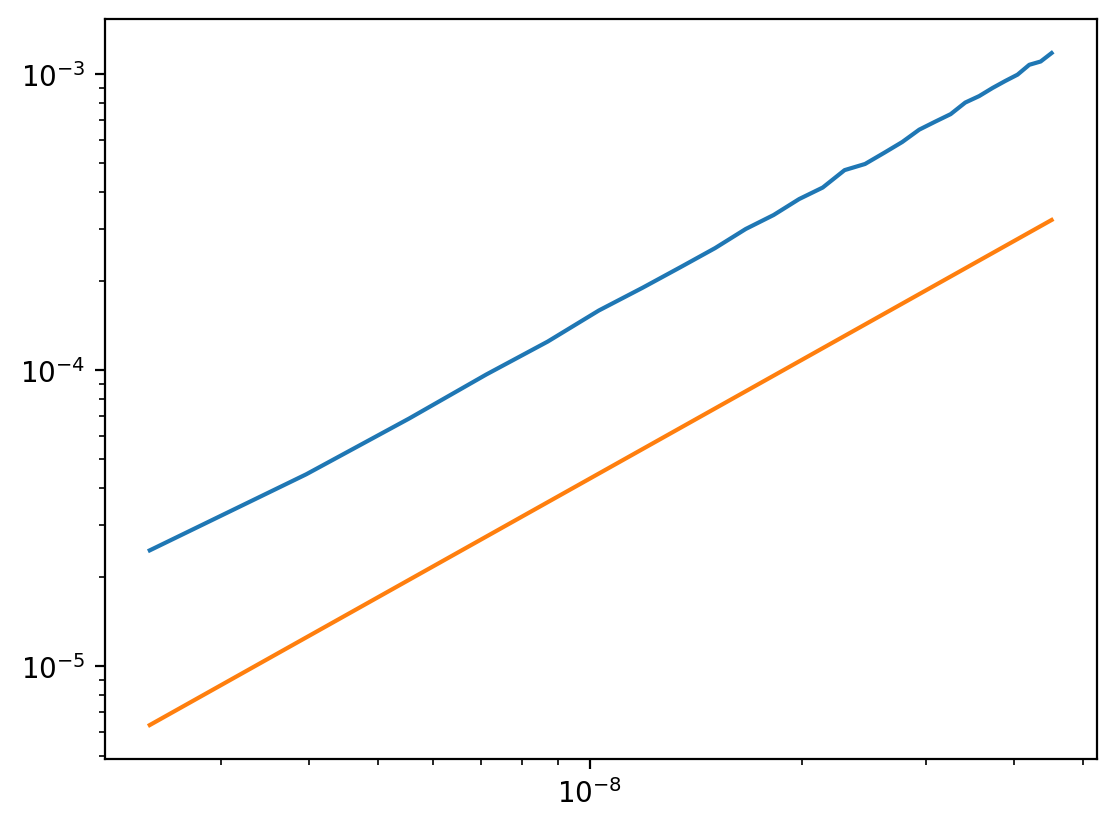

In [486]:
# variance of 0.5*log10(rho^2)
plt.loglog(bmid, np.var(0.5*np.log10(omega / bmid[:, None]**5.), axis=1))
plt.loglog(bmid, 2e6*bmid**-(lamb_da+1))

# Sato-Polito & Kamiowkowski population simulation

In [159]:
# define models
# MODEL 1
model1 = dict(alpha=1, log10_M_star=np.log10(3.2*10**7), beta=3, z0=3, n0_dot=1e-2)
model2 = dict(alpha=0.5, log10_M_star=np.log10(7.5*10**7), beta=2.5, z0=2.4, n0_dot=5e-3)
model3 = dict(alpha=0., log10_M_star=np.log10(1.8*10**8), beta=2, z0=1.8, n0_dot=8e-4)
model4 = dict(alpha=-0.5, log10_M_star=np.log10(4.2*10**8), beta=1.5, z0=1.1, n0_dot=5e-5)
model5 = dict(alpha=-1, log10_M_star=9., beta=1, z0=0.5, n0_dot=1e-6)

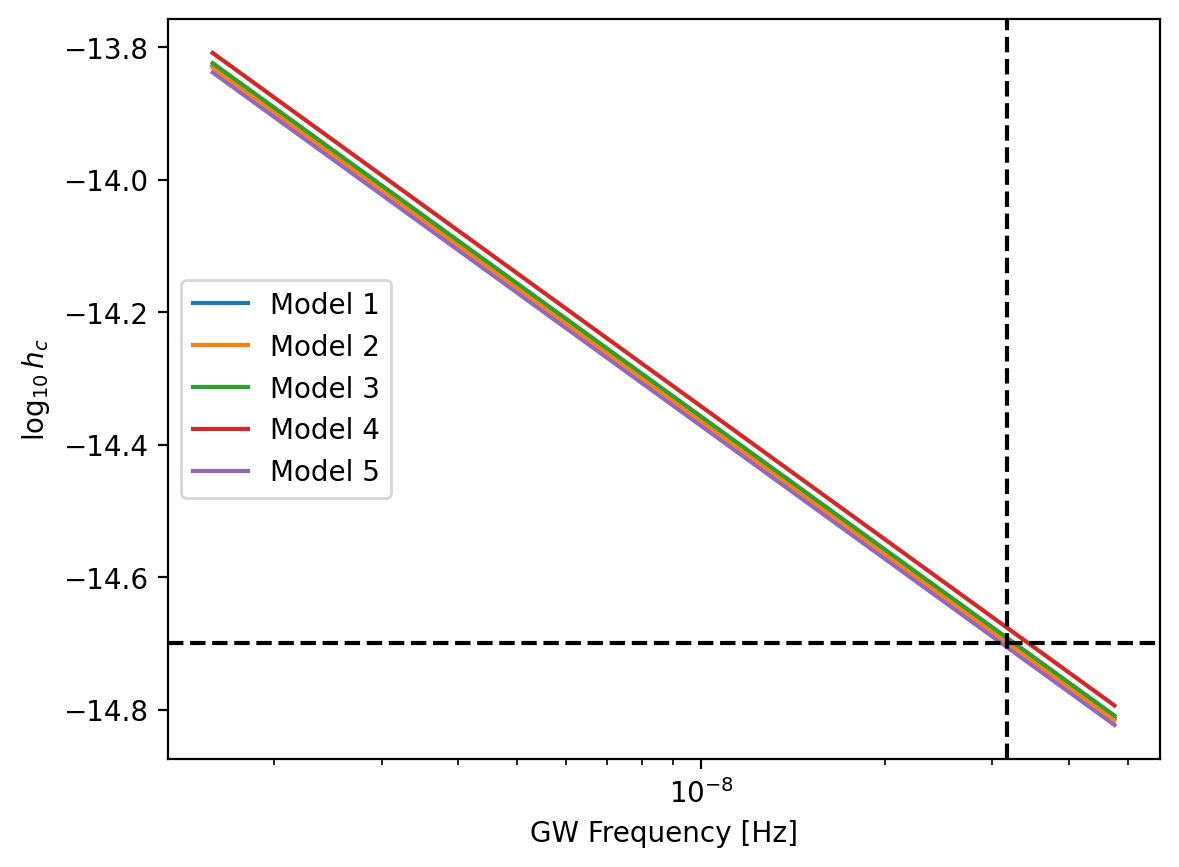

In [160]:
Tspan = 20 * 365.24 * 86400.0
bins = 500
models = [model1, model2, model3, model4, model5]
for ii, model in enumerate(models):
    ps = pop_synth.PopSynth(zbins=bins, log10Mbins=bins, Tspan=Tspan,
                            model_params=model)
    log10_hc2_ideal = ps.log10_hc2_ideal(ps.log10_M, ps.z, model)
    plt.plot(np.exp(ps.log_f), log10_hc2_ideal/2, label=f'Model {ii+1}')
plt.xlabel('GW Frequency [Hz]')
plt.xscale('log')
plt.ylabel(r'$\log_{10}h_c$')
plt.axhline(np.log10(2*10**-15), c='k', ls='--')
plt.axvline(1/(365.24*86400), c='k', ls='--')
plt.legend();

In [161]:
ps = pop_synth.PopSynth(zbins=bins, log10Mbins=bins, Tspan=Tspan,
                        model_params=model5)
ps.max_mass

array([9.75751503, 9.57715431, 9.43687375, 9.30661323, 9.19639279,
       9.08617234, 8.9759519 , 8.8757515 , 8.76553106, 8.66533066,
       8.56513026, 8.45490982, 8.35470942, 8.25450902, 8.15430862,
       8.05410822, 7.95390782, 7.85370741, 7.76352705, 7.66332665,
       7.57314629, 7.48296593, 7.39278557, 7.31262525, 7.22244489,
       7.14228457, 7.06212425, 6.98196393, 6.91182365, 6.83166333])

Text(0, 0.5, '$\\log_{10} dn/dz d\\log_{10}\\mathcal{M}$')

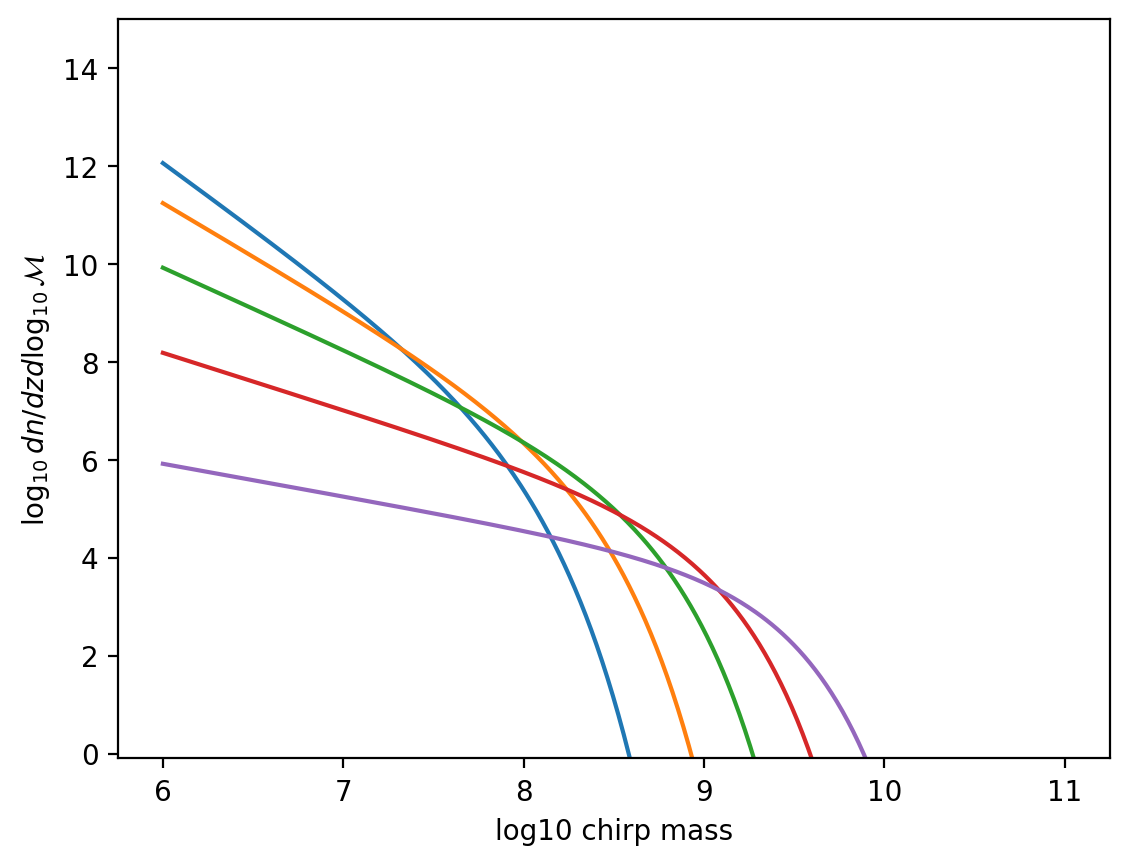

In [162]:
log10_M = np.linspace(6, 11, bins)
[plt.plot(ps.log10_M, ps.smbhb_number_per_bin(np.log10(np.exp(ps.log_f[0])), 0.1,
                                              log10_M, model))
 for model in [model1, model2, model3, model4, model5]];
plt.ylim(-0.1, 15)
plt.xlabel('log10 chirp mass')
plt.ylabel(r'$\log_{10} dn/dz d\log_{10}\mathcal{M}$')

Text(0, 0.5, '$\\log_{10} dn/dz d\\log_{10}\\mathcal{M}$')

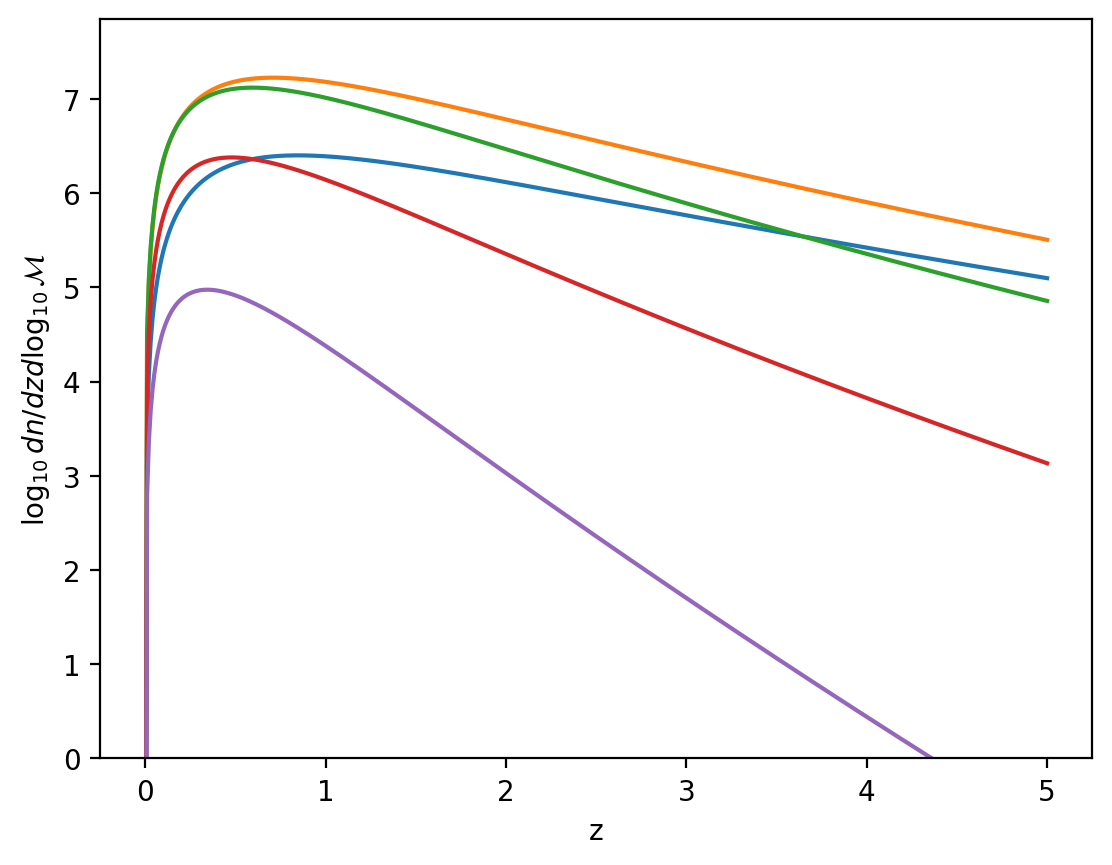

In [163]:
[plt.plot(ps.z, ps.smbhb_number_per_bin(np.log10(np.exp(ps.log_f[0])), ps.z,
                                        8., model))
 for model in [model1, model2, model3, model4, model5]];
plt.ylim(0)
plt.xlabel('z')
plt.ylabel(r'$\log_{10} dn/dz d\log_{10}\mathcal{M}$')

Text(0, 0.5, 'log10(dE/dlog10 f)')

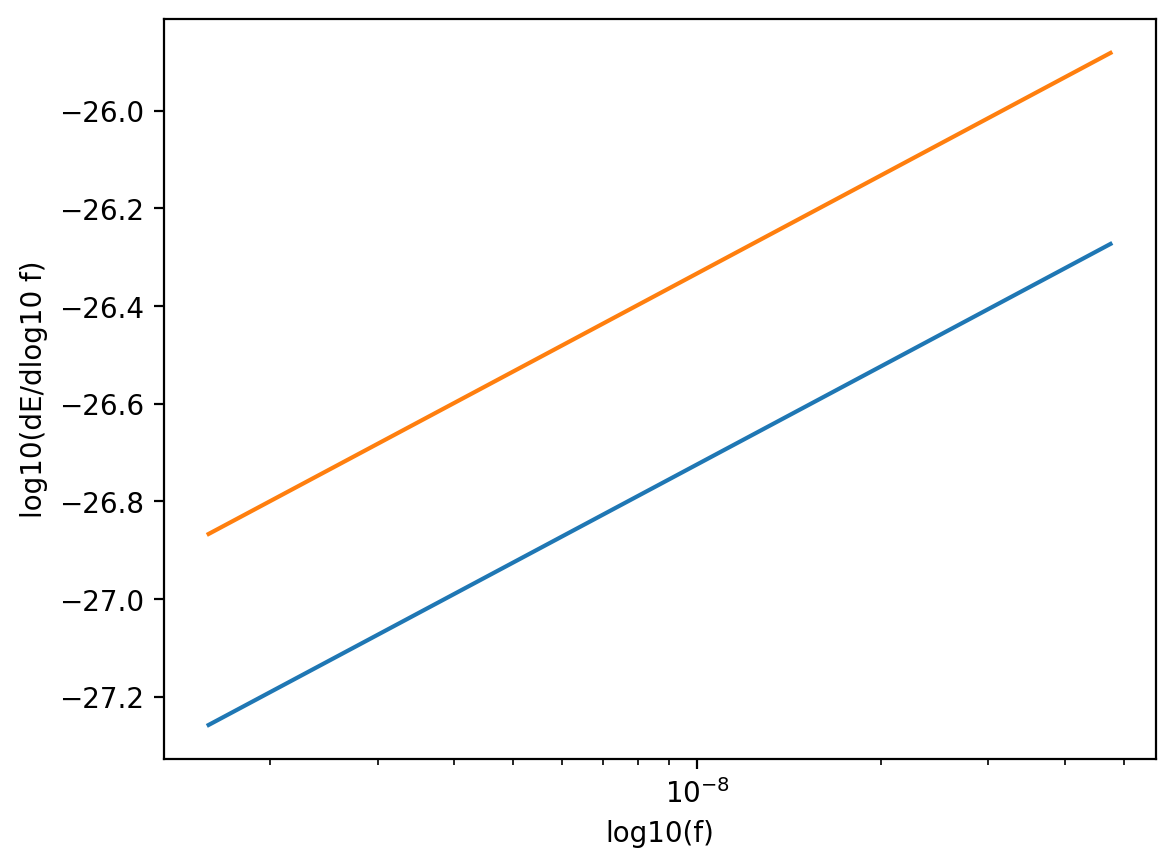

In [164]:
log10_dE_df = ps.log10_dE_dlogfr(np.log10(np.exp(ps.log_f)), 6, 2)
plt.plot(np.exp(ps.log_f), log10_dE_df)
plt.plot(np.exp(ps.log_f), np.log10(np.exp(ps.log_f)**(2/3)) - 21)
plt.xscale('log')
plt.xlabel('log10(f)')
plt.ylabel('log10(dE/dlog10 f)')

Text(0, 0.5, '$h_\\mathrm{c}^2(f)$')

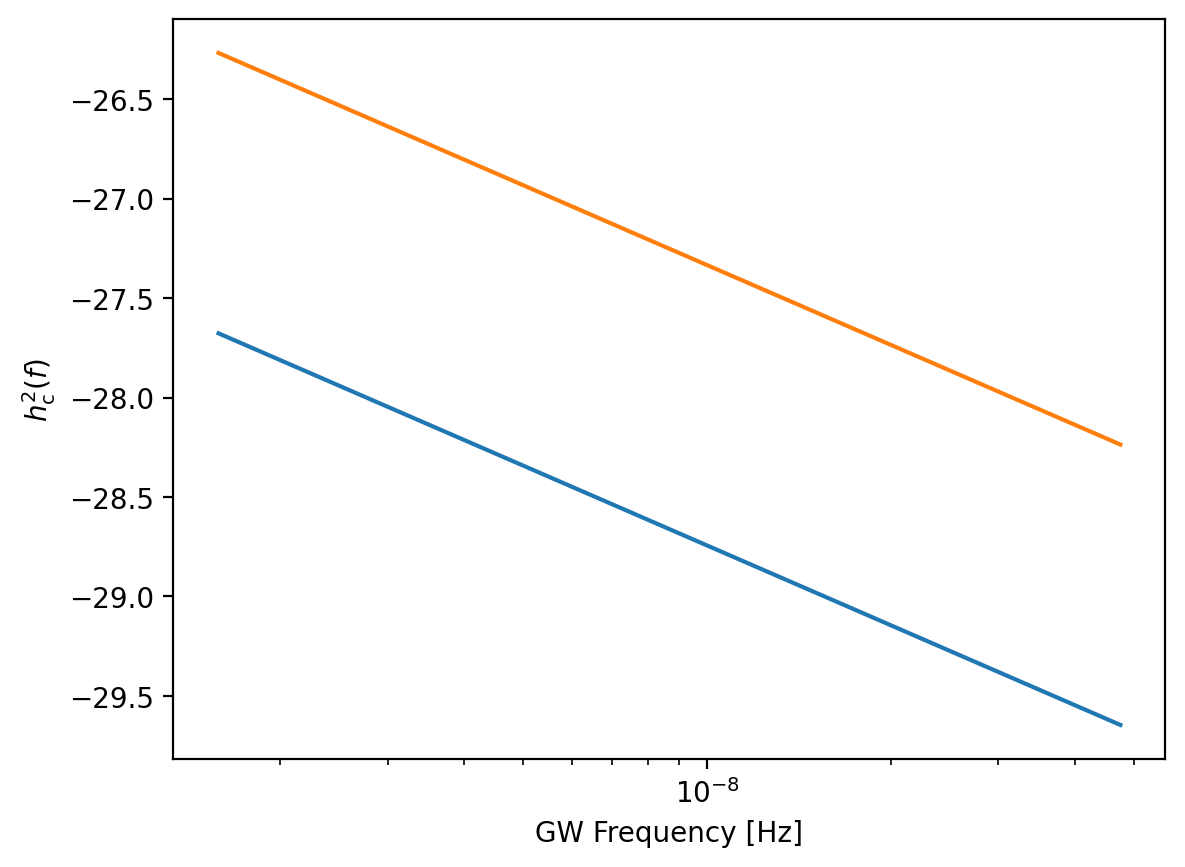

In [165]:
plt.plot(np.exp(ps.log_f), log10_hc2_ideal)
plt.plot(np.exp(ps.log_f), np.log10(np.exp(ps.log_f)**(-4/3)) - 38)
plt.xlabel('GW Frequency [Hz]')
plt.xscale('log')
plt.ylabel(r'$h_\mathrm{c}^2(f)$')

Text(0, 0.5, '$\\log_{10}\\rho$')

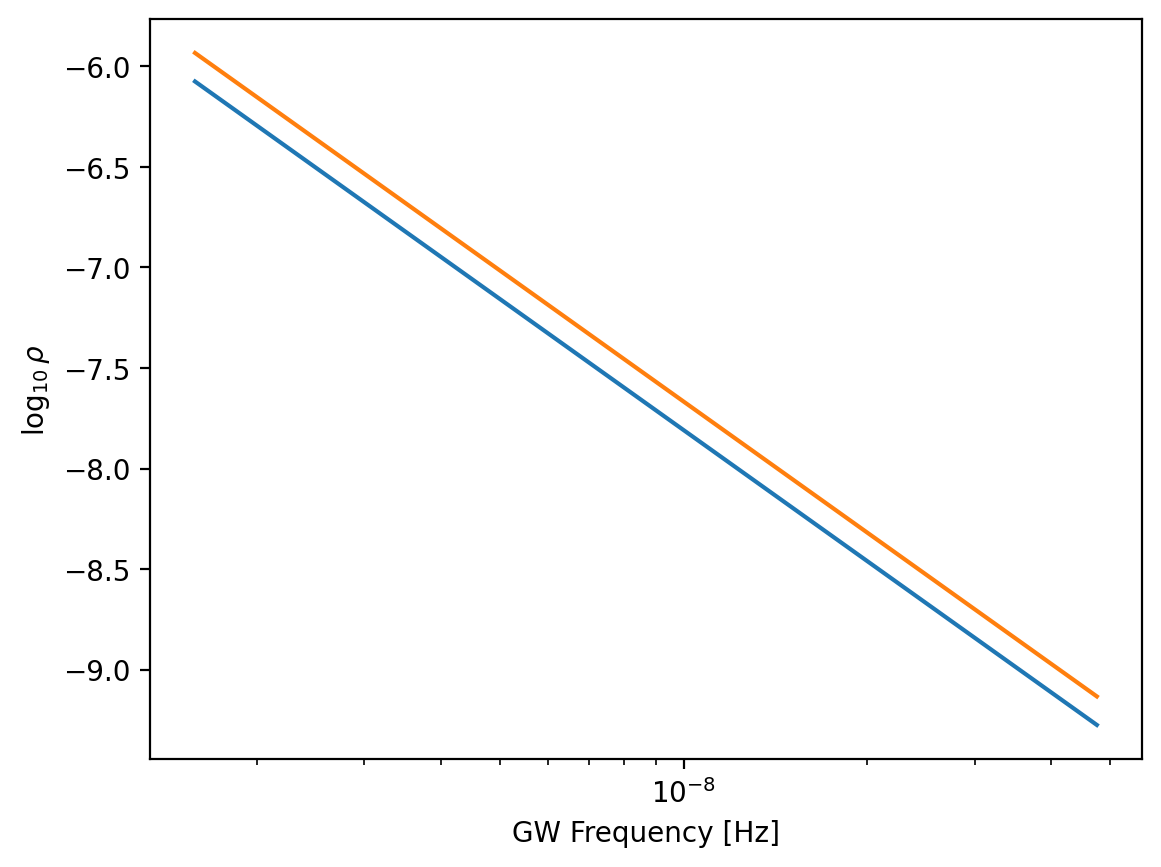

In [166]:
plt.plot(np.exp(ps.log_f), 0.5*(log10_hc2_ideal -
                           np.log10(12*np.pi**2*ps.Tspan) - 3*np.log10(np.exp(ps.log_f))))
plt.plot(np.exp(ps.log_f), 0.5*np.log10(np.exp(ps.log_f)**(-13/3)) - 25)
plt.xlabel('GW Frequency [Hz]')
plt.xscale('log')
plt.ylabel(r'$\log_{10}\rho$')

In [167]:
# compute dN for freq bin f
dN = np.zeros((5, 100))
models = [model1, model2, model3, model4, model5]
Tspan = 20 * 365.24 * 86400.0

for ii in range(5):
    ps = pop_synth.PopSynth(zbins=bins, log10Mbins=bins, Tspan=Tspan,
                            Nfreqs=100, model_params=models[ii])
    for log10_fi in range(100):
        log10_M_eff = ps.log10_M  #[ps.log10_M <= ps.max_mass[log10_fi]]
        phi_dist = ps.smbhb_number_per_bin(np.log10(np.exp(ps.log_f[log10_fi])),
                                           ps.z[None, :],
                                           log10_M_eff[:, None],
                                           models[ii])
        dN[ii, log10_fi] = np.trapz(np.trapz(10**phi_dist, ps.z, axis=1),
                                    log10_M_eff) * ps.dlog_f[log10_fi]

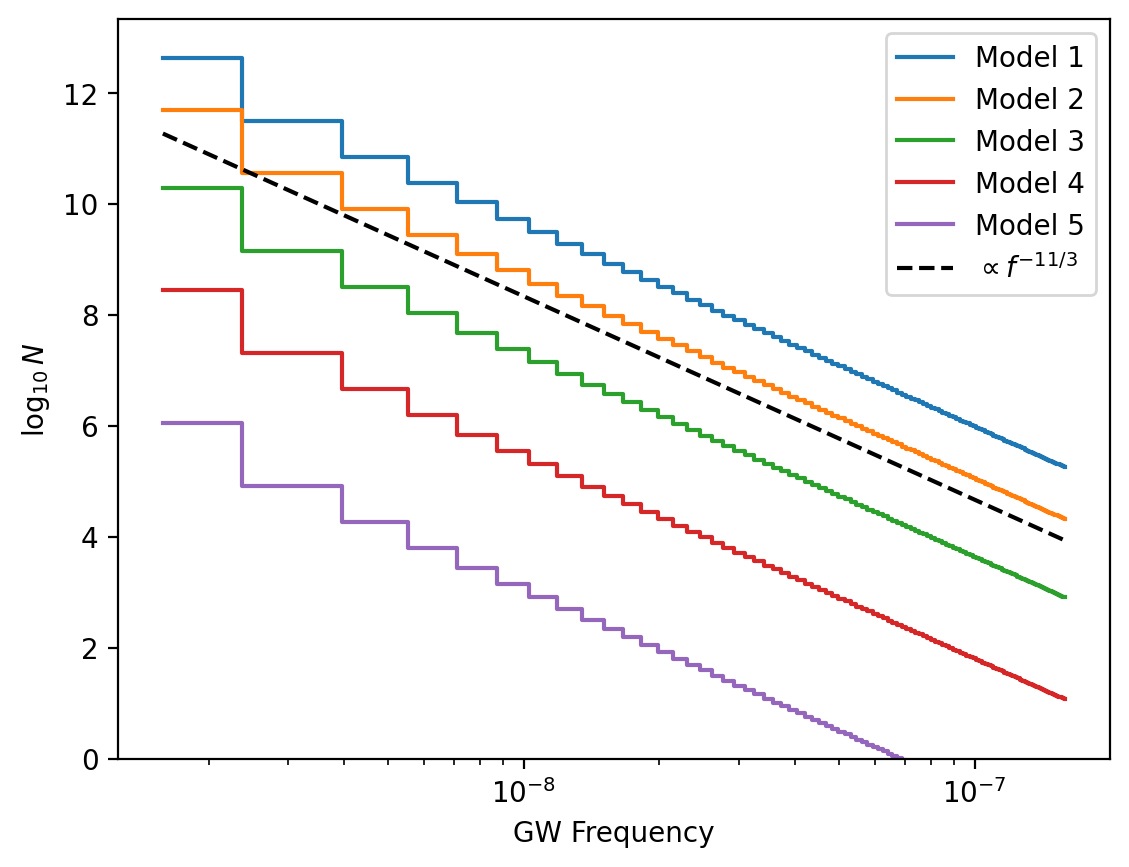

In [169]:
[plt.step(np.exp(ps.log_f), np.log10(dN[ii]), where='mid',
          label=f'Model {ii+1}') for ii in range(5)];
plt.plot(np.exp(ps.log_f), -21-(11/3) * np.log10(np.exp(ps.log_f)),
         label=r'$\propto f^{-11/3}$', ls='--', c='k')
plt.xscale('log')
plt.ylim(0)
#plt.xlim(1e-9, 1e-7)
plt.xlabel('GW Frequency')
plt.ylabel(r'$\log_{10} N$')
plt.legend();

In [171]:
np.log10(dN[-1])

array([ 6.04349181,  4.90817338,  4.25727325,  3.79737147,  3.44121131,
        3.15043446,  2.90469478,  2.69188386,  2.50420556,  2.336343  ,
        2.18450689,  2.04590098,  1.91840269,  1.80036265,  1.69047367,
        1.58768219,  1.49112659,  1.40009325,  1.31398444,  1.23229455,
        1.15459203,  1.08050566,  1.00971373,  0.94193565,  0.87692525,
        0.8144653 ,  0.75436321,  0.69644742,  0.64056441,  0.58657631,
        0.53435882,  0.48379945,  0.43479615,  0.38725598,  0.34109408,
        0.29623279,  0.25260081,  0.21013257,  0.1687676 ,  0.12845001,
        0.08912809,  0.05075382,  0.0132826 , -0.02332709, -0.05911398,
       -0.09411425, -0.12836173, -0.16188813, -0.19472319, -0.22689484,
       -0.25842937, -0.28935151, -0.31968461, -0.34945068, -0.37867053,
       -0.40736386, -0.4355493 , -0.46324452, -0.49046628, -0.5172305 ,
       -0.54355231, -0.56944608, -0.59492553, -0.62000371, -0.64469305,
       -0.66900543, -0.69295219, -0.71654416, -0.7397917 , -0.76

#### let's try this again - monte carlo draw from $dN/dzdlog_{10}Md\log f$

In [48]:
G = 4.517103 * 10**-48  # Mpc3 / Msun s2
c = 9.7156119 * 10**-15  # Mpc / s

model5 = dict(alpha=-1, log10_M_star=9., beta=1, z0=0.5, n0_dot=1e-6)

In [6]:
gridbins = 100
f = np.linspace(1e-9, 1e-7, gridbins+1) # frequncy grid
#log_f = np.linspace(np.log(1e-9), np.log(1e-7), gridbins+1)
#log10_M_binedges = np.linspace(6, 11, gridbins+1)
M_binedges = np.linspace(10**6, 10**11, gridbins+1)
z_binedges = np.linspace(1e-5, 5, gridbins+1)
Tspan = 20. * 365.24 * 86400.0

# compute dn/dz dlog10M at the edges
ps = pop_synth.PopSynth(zbins=500, log10Mbins=500, Tspan=Tspan,
                        model_params=model5)

In [7]:
# distribution of M and z
#dn = ps.smbhb_number_density(log10_M=log10_M_binedges[:, None],
#                             z=z_binedges[None, :], 
#                             **model5)
dN = ps.smbhb_number_per_bin(log10_f=np.log10(f)[:, None, None],
                             #log10_f = log_f[:, None, None]/np.log(10),
                             z=z_binedges[None, None, :],
                             #log10_M=log10_M_binedges[None, :, None],
                             log10_M=np.log10(M_binedges[None, :, None]),
                             model_params=model5)

#log10_M_mid = 0.5 * (log10_M_binedges[1:] + log10_M_binedges[:-1])
log10_M_mid = np.log10(0.5 * (M_binedges[1:] + M_binedges[:-1]))
z_mid = 0.5 * (z_binedges[1:] + z_binedges[:-1])

In [8]:
N = np.trapz(np.trapz(np.trapz(10**dN, z_binedges, axis=-1),
                      #log10_M_binedges, axis=-1),
                      np.log10(M_binedges), axis=-1),
                      np.log(f), axis=-1)

In [9]:
N  # number of binaries across rest-frame frequency, log10 chirp mass, and redshift

3767566.18879486

In [10]:
#gwb_ideal = 10**ps.log10_hc2_ideal(log10_M_binedges, z_binedges, model5)
gwb_ideal = 10**ps.log10_hc2_ideal(np.log10(M_binedges), z_binedges, model5)

In [11]:
gwb_ideal

array([3.60979881e-28, 1.43254961e-28, 8.34298234e-29, 5.68507688e-29,
       4.22204630e-29, 3.31091473e-29, 2.69578722e-29, 2.25612425e-29,
       1.92823362e-29, 1.67552018e-29, 1.47556864e-29, 1.31393738e-29,
       1.18093282e-29, 1.06982387e-29, 9.75801134e-30, 8.95343504e-30,
       8.25818172e-30, 7.65220020e-30, 7.11997053e-30, 6.64930626e-30,
       6.23051488e-30, 5.85579803e-30, 5.51881559e-30, 5.21436396e-30,
       4.93813531e-30, 4.68653502e-30, 4.45654174e-30, 4.24559883e-30,
       4.05152945e-30, 3.87246937e-30])

In [13]:
gridbins = int(1e6)
f = np.linspace(1e-9, 1e-7, gridbins+1) # frequncy grid
#log_f = np.linspace(np.log(1e-9), np.log(1e-7), gridbins+1)
#log10_M_binedges = np.linspace(6, 11, gridbins+1)
M_binedges = np.linspace(10**6, 10**11, gridbins+1)
z_binedges = np.linspace(1e-5, 5, gridbins+1)
Tspan = 20 * 365.24 * 86400.0

A = 1e-22
fmid = 0.5 * (f[1:] + f[:-1])
#fmid = np.log(0.5 * (np.exp(log_f[1:]) + np.exp(log_f[:-1]))) 
Nf = A * fmid**(-11/3)
#Nf = (-8/3) * fmid
rv_hist_f = ss.rv_histogram((Nf, f))

#log10_M_mid = 0.5 * (log10_M_binedges[1:] + log10_M_binedges[:-1])
M_mid = 0.5 * (M_binedges[1:] + M_binedges[:-1])
log10_M_mid = np.log10(M_mid)
z_mid = 0.5 * (z_binedges[1:] + z_binedges[:-1])

log10_M_dist = 10**-(10**(log10_M_mid-ps.model_params['log10_M_star'])*np.log10(np.e)
                - ps.model_params['alpha']*(log10_M_mid - 7) -
                (5/3)*(np.log10(G/c**3)+log10_M_mid) - np.log10(96*np.pi**(8/3)/5))
M_dist = log10_M_dist * np.log(10) * 10**log10_M_mid
z_dist = (ps.model_params['beta'] * np.log10(1+z_mid) -
          (z_mid/ps.model_params['z0']) * np.log10(np.e) -
          np.log10((1+z_mid) * ps.cosmo.H(z_mid).value) +
          np.log10(4 * np.pi * c * (1+z_mid) *
                   ps.cosmo.angular_diameter_distance(z_mid).to(u.Mpc).value**2))

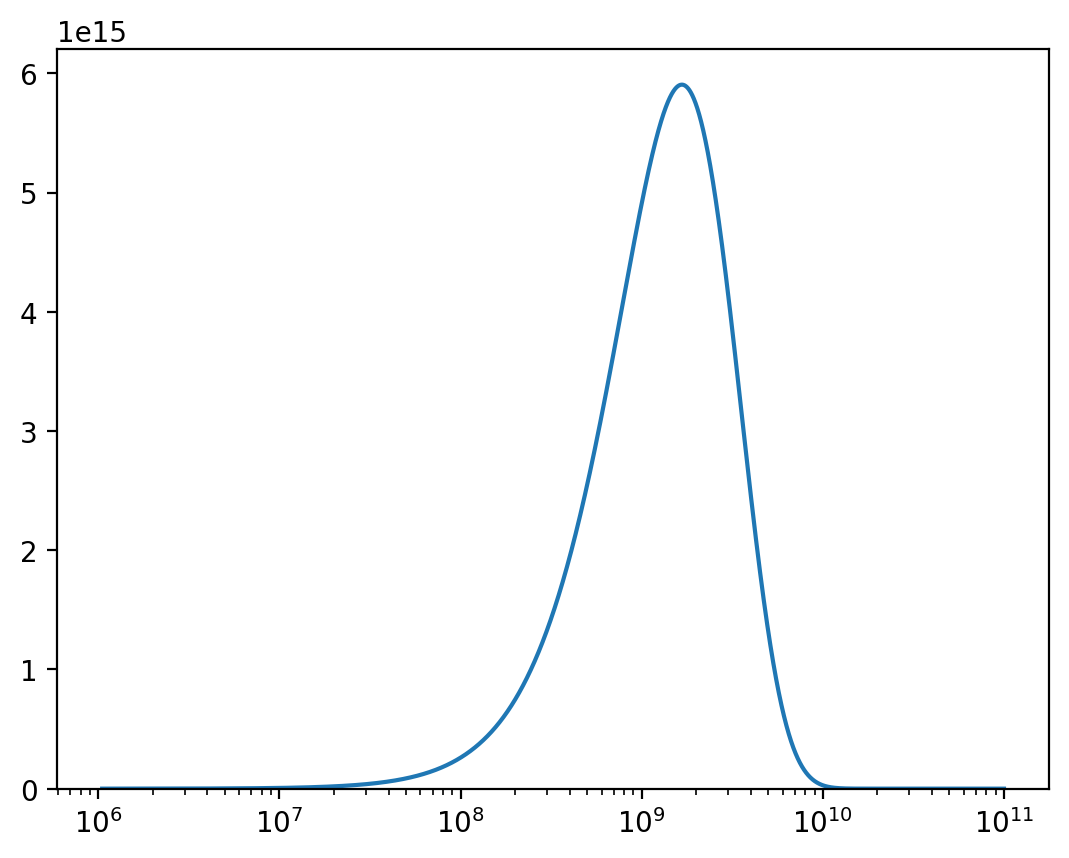

In [14]:
plt.plot(M_mid, M_dist)
plt.ylim(1)
plt.xscale('log', base=10)
#plt.yscale('log', base=10)

In [15]:
rv_hist_log10_M = rv_histogram((np.log10(M_dist), np.log10(M_binedges)))
#rv_hist_log10_M = rv_histogram((M_dist, M_binedges))
rv_hist_z = rv_histogram((10**z_dist, z_binedges))

/var/folders/n5/tlyhfd1j5s7gm9fxj02byc0c0000gn/T/ipykernel_58108/2666035262.py:1: RuntimeWarning: Bin widths are not constant. Assuming `density=True`.Specify `density` explicitly to silence this warning.
  rv_hist_log10_M = rv_histogram((np.log10(M_dist), np.log10(M_binedges)))


(array([4840., 5107., 5203., 5505., 5585., 5865., 6028., 6278., 6288.,
        6517., 6717., 6839., 6807., 6735., 6523., 6252., 2911.,    0.,
           0.,    0.]),
 array([ 6.  ,  6.25,  6.5 ,  6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,
         8.25,  8.5 ,  8.75,  9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25,
        10.5 , 10.75, 11.  ]),
 <BarContainer object of 20 artists>)

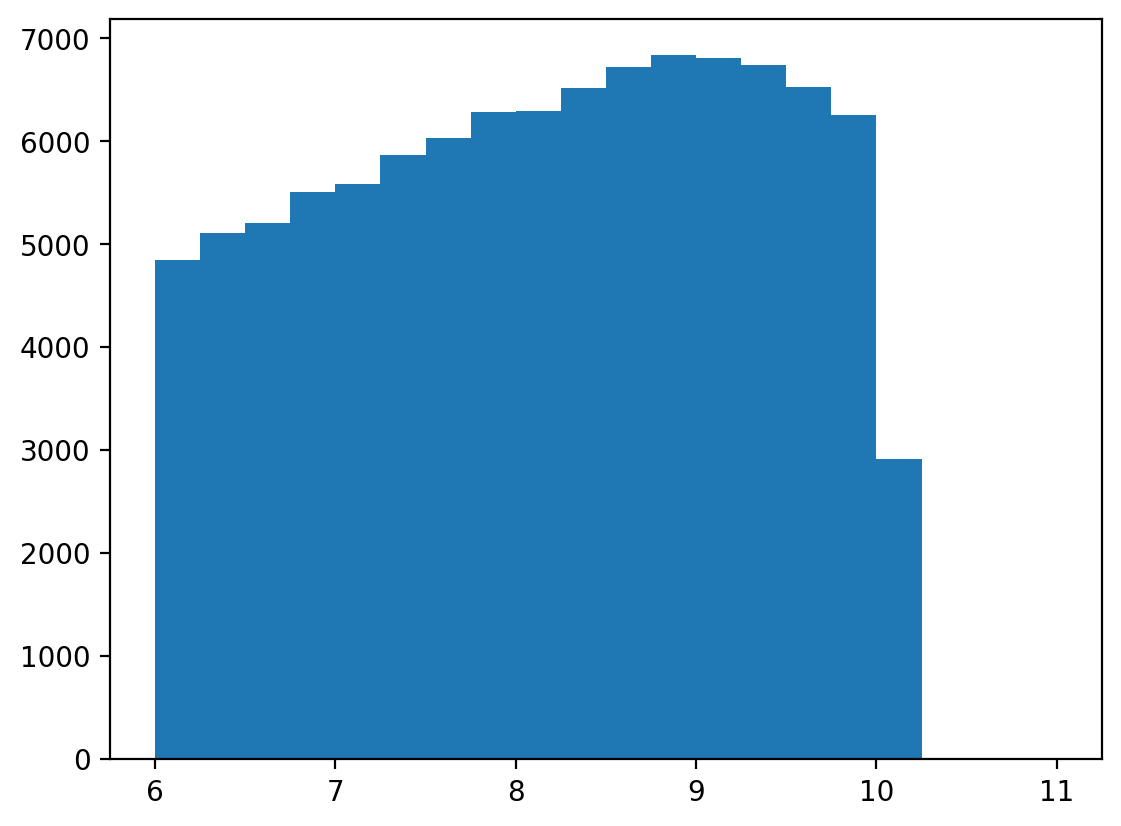

In [16]:
#M_samples = np.log10(rv_hist_log10_M.rvs(size=100000))
M_samples = rv_hist_log10_M.rvs(size=100000)
plt.hist(M_samples, bins=np.linspace(6, 11, 21))
#plt.yscale('log')

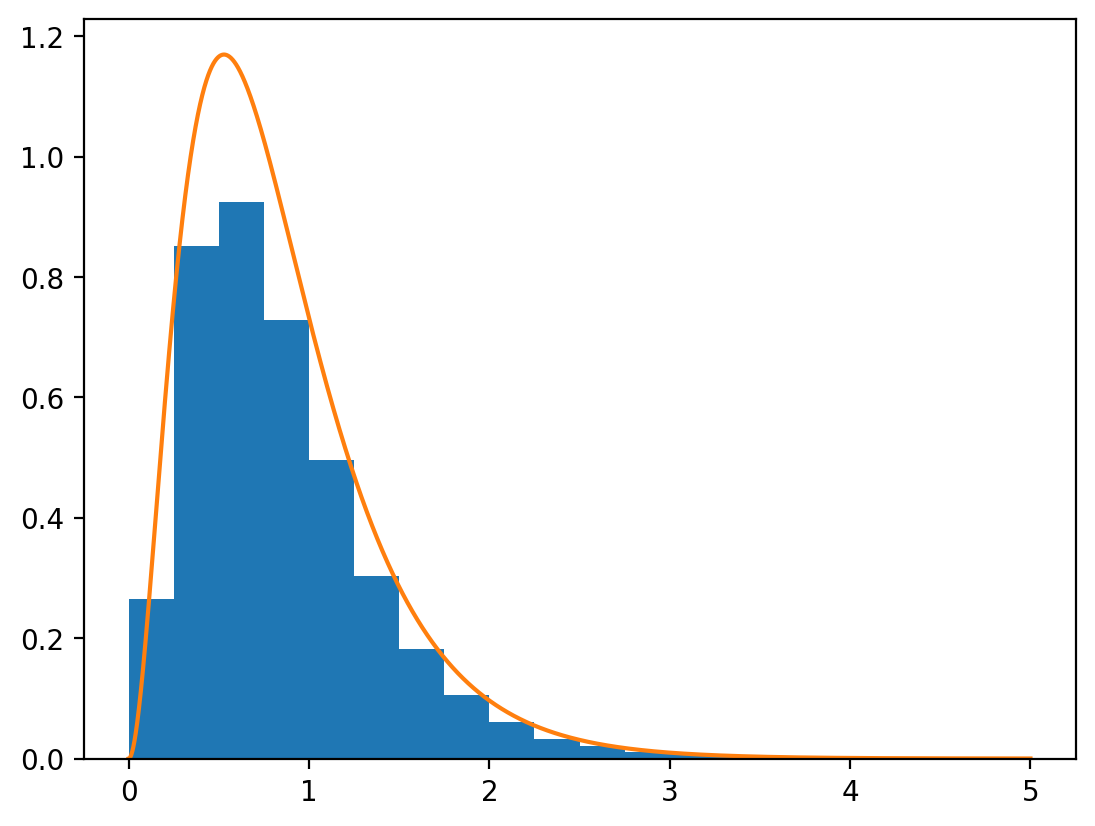

In [17]:
z_samples = rv_hist_z.rvs(size=100000)
plt.hist(z_samples, bins=np.linspace(0, 5, 21), density=True);
plt.plot(z_mid, 10**z_dist * 1e9)
#plt.yscale('log')

In [206]:
## Create structures for Omega_gw across realizations
bins = (np.arange(1, 32) - 0.5) / Tspan # 20-year bins
bmid = 0.5 * (bins[1:] + bins[:-1]) # bin mids

# correct lower bin
#bins[0] = 0.75 / Tspan

nsamples = 3767566  #int(np.rint(N))
nreal = 10
hc2_binned = np.zeros((bmid.shape[0], nreal)) # frequency-bins x realizations x samples

log10_mc_bins = np.linspace(6, 11, 26)
log10_mc_binned = np.zeros((log10_mc_bins.shape[0]-1, nreal))

z_bins = np.linspace(0, 5, 26)
z_binned = np.zeros((z_bins.shape[0]-1, nreal))

In [207]:
def hc2_f(f, log10_M, z):
    """
    """
    dL2 = ps.cosmo.luminosity_distance(z).to(u.Mpc).value ** -2.
    fr = (1+z)*f
    hc2 = 32/5 * c**-8. * (G * 10**log10_M)**(10/3) * dL2 * (np.pi*fr)**(4/3)

    return hc2

In [208]:
for ii in range(nreal):
    f_samples = rv_hist_f.rvs(size=nsamples)
    #log10_M_samples = np.log10(rv_hist_log10_M.rvs(size=nsamples))
    log10_M_samples = rv_hist_log10_M.rvs(size=nsamples)
    z_samples = rv_hist_z.rvs(size=nsamples)

    hc2 = hc2_f(f_samples, log10_M_samples, z_samples)

    fobs = f_samples
    mask = np.digitize(fobs, bins) - 1  # convert from rest-frame to obs freqs

    for jj, bin in enumerate(bmid):
        hc2_binned[jj, ii] = (hc2[mask==jj]*fobs[mask==jj]).sum() * Tspan

    mask_mc = np.digitize(log10_M_samples, log10_mc_bins) - 1
    for jj, bin in enumerate(range(log10_mc_bins.shape[0]-1)):
        log10_mc_binned[jj, ii] = (hc2[mask_mc==jj]*fobs[mask_mc==jj]).sum() * Tspan

    mask_z = np.digitize(z_samples, z_bins) - 1
    for jj in range(z_bins.shape[0] - 1):
        z_binned[jj, ii] = (hc2[mask_z==jj]*fobs[mask_z==jj]).sum() * Tspan

In [18]:
plt.hist(f_samples, bins=bins, histtype='step', color='k')
plt.plot(bmid, 2e-26 * bmid**(-11/3))
plt.xscale('log')

plt.yscale('log')

NameError: name 'f_samples' is not defined

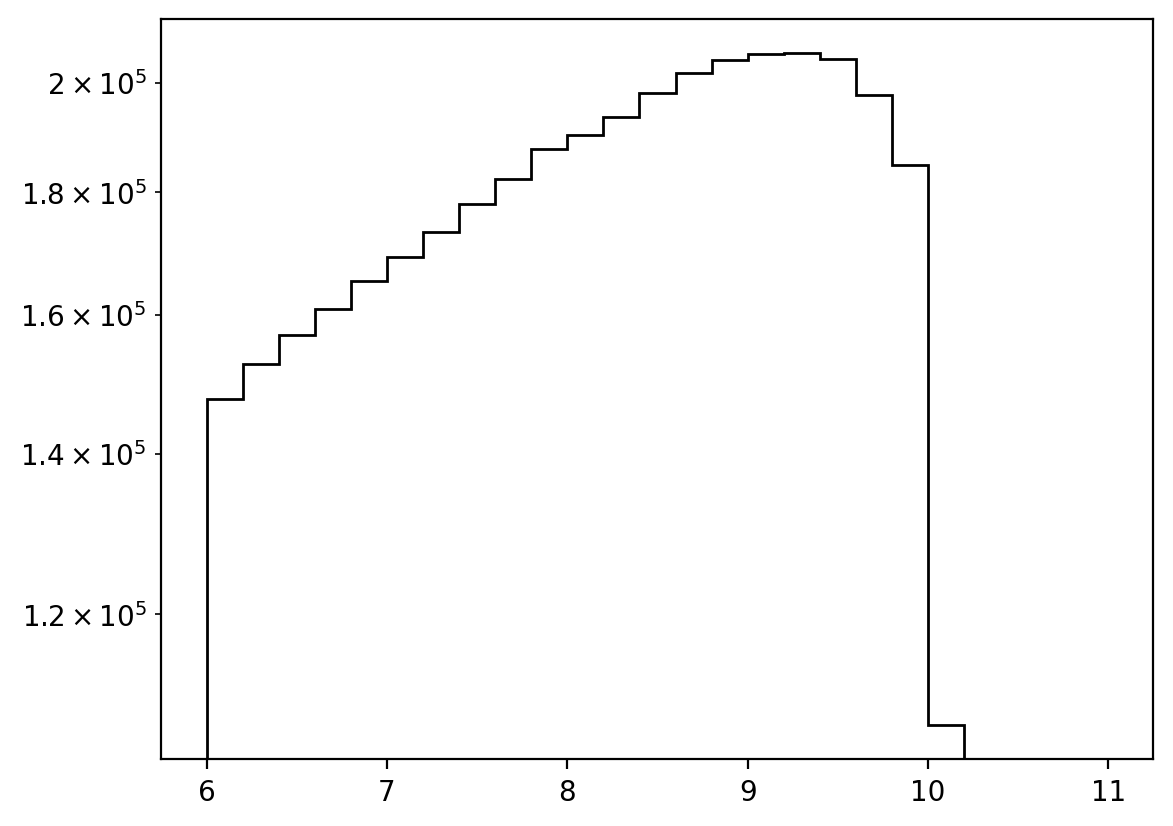

In [210]:
plt.hist(log10_M_samples, bins=np.linspace(6, 11, 26), histtype='step', color='k')
plt.yscale('log', base=10)

(array([1.49846e+05, 5.47626e+05, 7.15476e+05, 6.67533e+05, 5.30506e+05,
        3.86869e+05, 2.66226e+05, 1.78173e+05, 1.17931e+05, 7.56810e+04,
        4.86200e+04, 3.07590e+04, 1.94750e+04, 1.22720e+04, 7.68600e+03,
        4.81500e+03, 3.14700e+03, 1.89900e+03, 1.17100e+03, 7.33000e+02,
        4.53000e+02, 3.05000e+02, 1.93000e+02, 1.06000e+02, 6.50000e+01]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 [<matplotlib.patches.Polygon at 0x167d91ae0>])

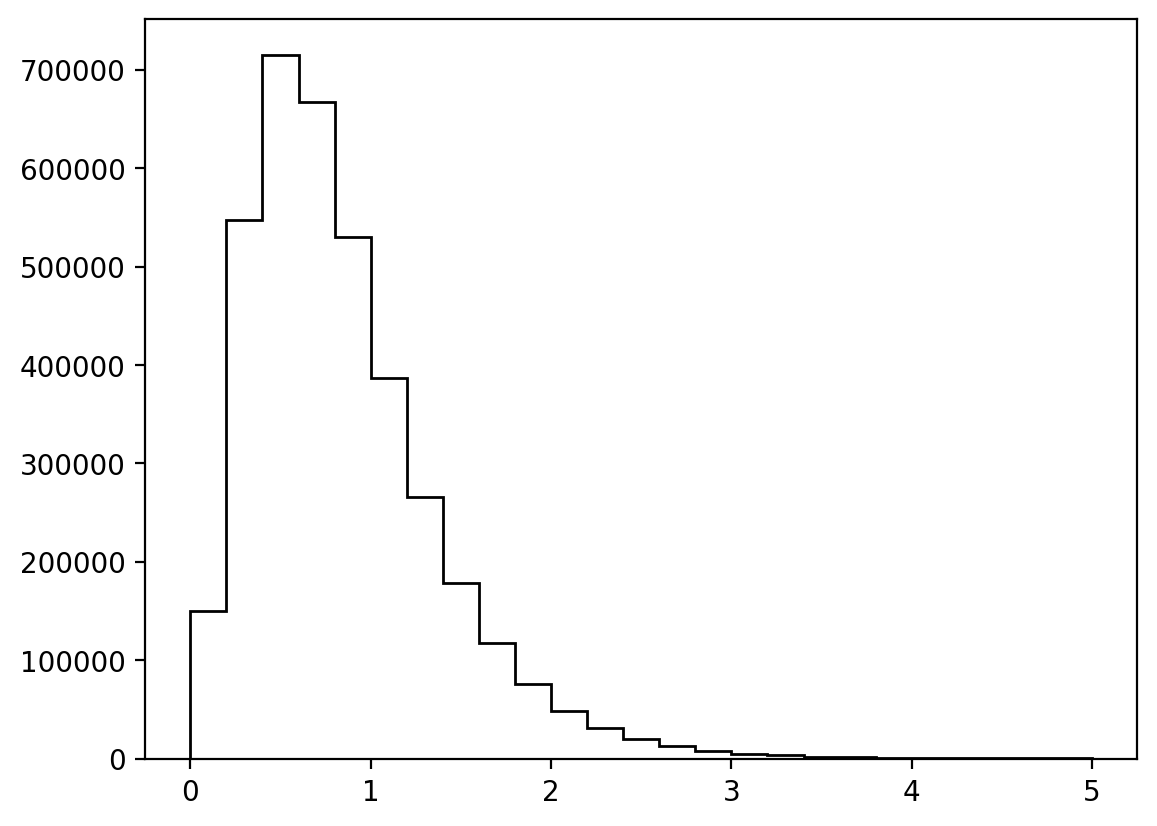

In [211]:
plt.hist(z_samples, bins=np.linspace(0, 5, 26), histtype='step', color='k')
#plt.yscale('log', base=10)

/var/folders/n5/tlyhfd1j5s7gm9fxj02byc0c0000gn/T/ipykernel_24233/938657429.py:2: RuntimeWarning: divide by zero encountered in log10
  [plt.step(log10_mc_mid, 0.5*np.log10(log10_mc_binned[:, ii]), alpha=0.1, c='C0',


(-17.0, -11.385501213972157)

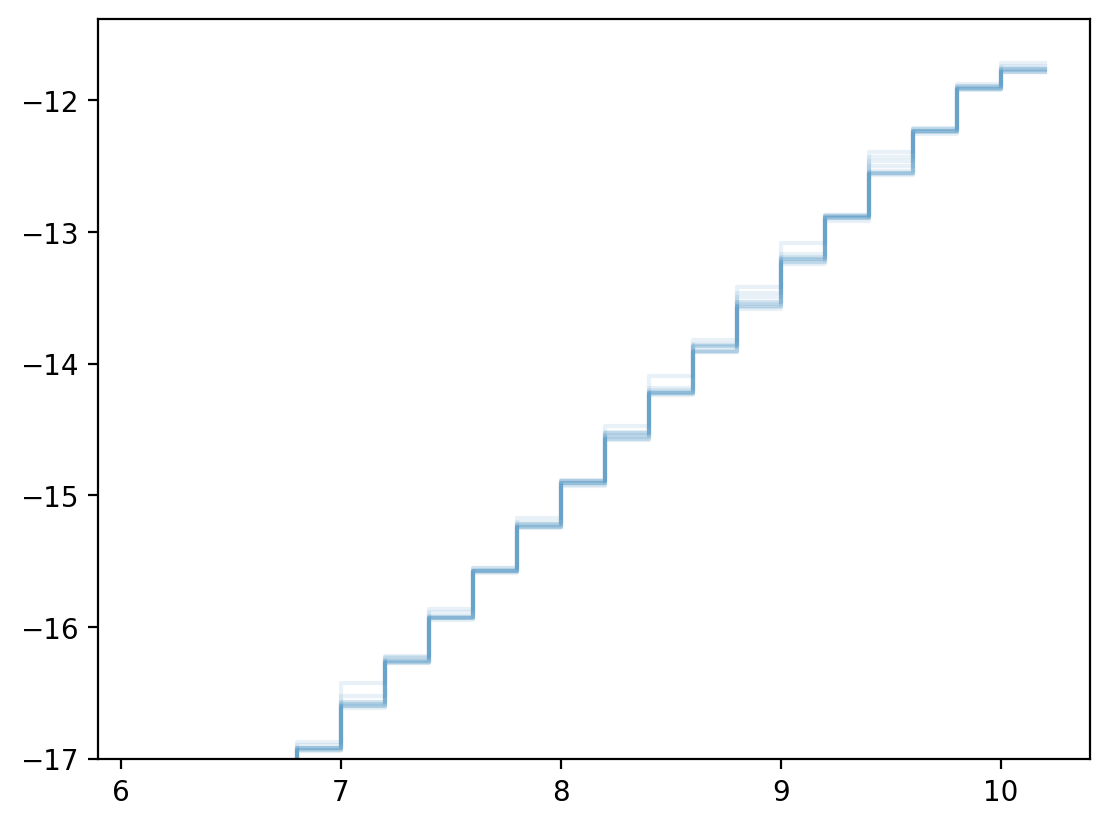

In [212]:
log10_mc_mid = 0.5 * (log10_mc_bins[1:] + log10_mc_bins[:-1])
[plt.step(log10_mc_mid, 0.5*np.log10(log10_mc_binned[:, ii]), alpha=0.1, c='C0',
          where='mid') for ii in range(nreal)]
plt.ylim(-17)

(-17.0, -11.571889456505746)

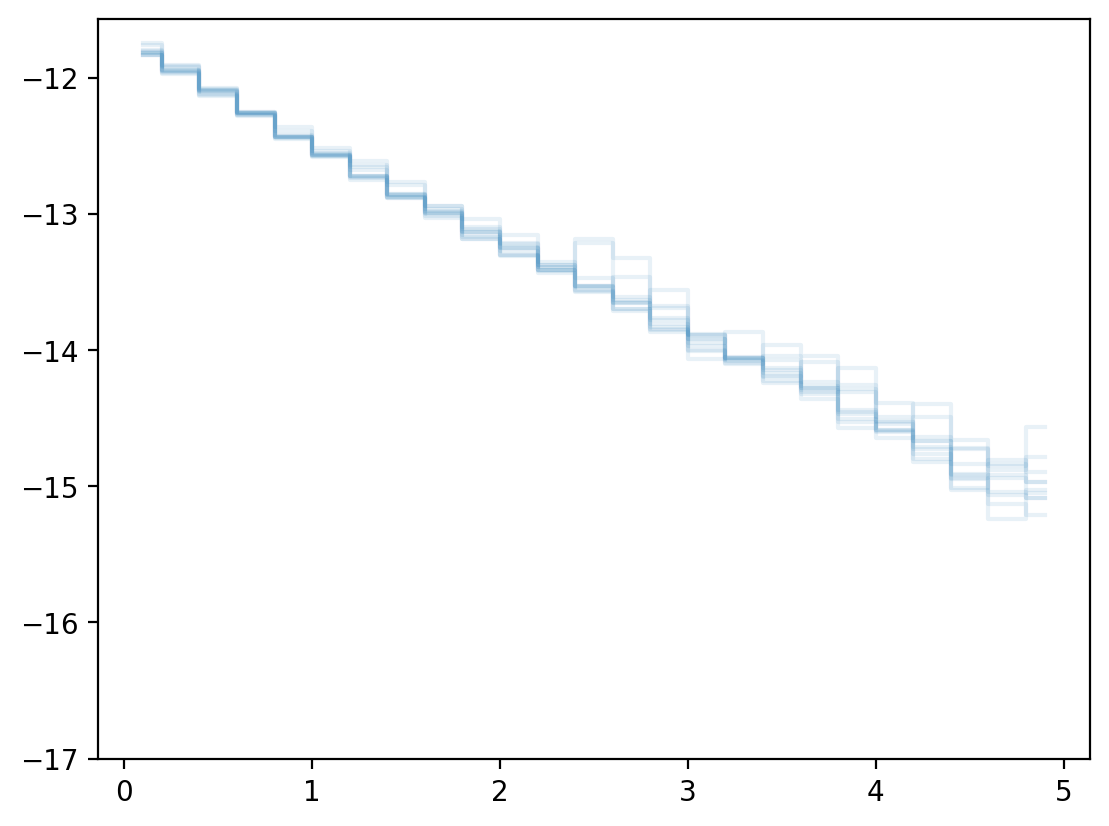

In [217]:
z_mid = 0.5 * (z_bins[1:] + z_bins[:-1])
[plt.step(z_mid, 0.5*np.log10(z_binned[:, ii]), alpha=0.1, c='C0', where='mid')
 for ii in range(nreal)]
plt.ylim(-17)

In [218]:
gwb_ideal

array([3.60979881e-28, 1.43254961e-28, 8.34298234e-29, 5.68507688e-29,
       4.22204630e-29, 3.31091473e-29, 2.69578722e-29, 2.25612425e-29,
       1.92823362e-29, 1.67552018e-29, 1.47556864e-29, 1.31393738e-29,
       1.18093282e-29, 1.06982387e-29, 9.75801134e-30, 8.95343504e-30,
       8.25818172e-30, 7.65220020e-30, 7.11997053e-30, 6.64930626e-30,
       6.23051488e-30, 5.85579803e-30, 5.51881559e-30, 5.21436396e-30,
       4.93813531e-30, 4.68653502e-30, 4.45654174e-30, 4.24559883e-30,
       4.05152945e-30, 3.87246937e-30])

In [219]:
hc2_binned[:, 0]

array([1.73616595e-24, 7.34155733e-25, 4.57879118e-25, 2.83264379e-25,
       1.81678343e-25, 2.14417698e-25, 9.43470616e-26, 7.99981113e-26,
       9.60827264e-26, 5.68309986e-26, 4.96906826e-26, 6.02783169e-26,
       7.76181189e-26, 2.60773531e-26, 3.81818645e-26, 4.21804255e-26,
       2.03195021e-26, 8.09434936e-27, 3.39077393e-26, 1.05424047e-26,
       1.94524200e-27, 7.56030693e-27, 7.56606369e-27, 1.29271439e-25,
       3.49570151e-28, 8.44255202e-27, 1.25464295e-26, 1.15294976e-26,
       9.20529044e-28, 3.02219653e-27])

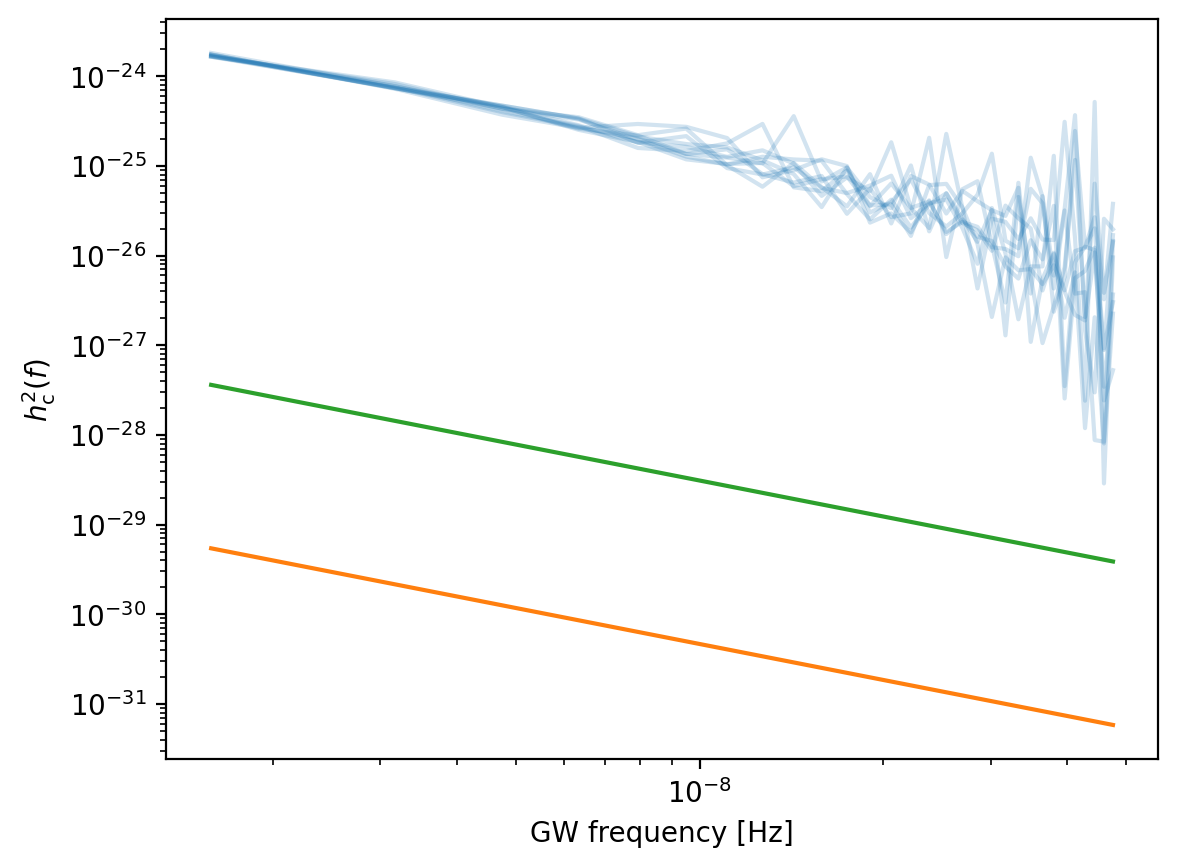

In [216]:
# Plot h_c for all realizations
fyr = 1 / 365.24 / 86400.0

for jj in range(nreal): #dN.shape[1]):
  #plt.loglog(bmid, A*dN[:, jj]*np.log(10), alpha=0.2, color='C0')
  plt.loglog(bmid, hc2_binned[:, jj], alpha=0.2, color='C0')
plt.loglog(bmid, 1e-31 * (bmid/fyr)**(-4/3.), color='C1')
plt.loglog(bmid, gwb_ideal, color='C2')

plt.xlabel('GW frequency [Hz]');
plt.ylabel(r'$h_\mathrm{c}^2(f)$');
plt.show()
plt.close();

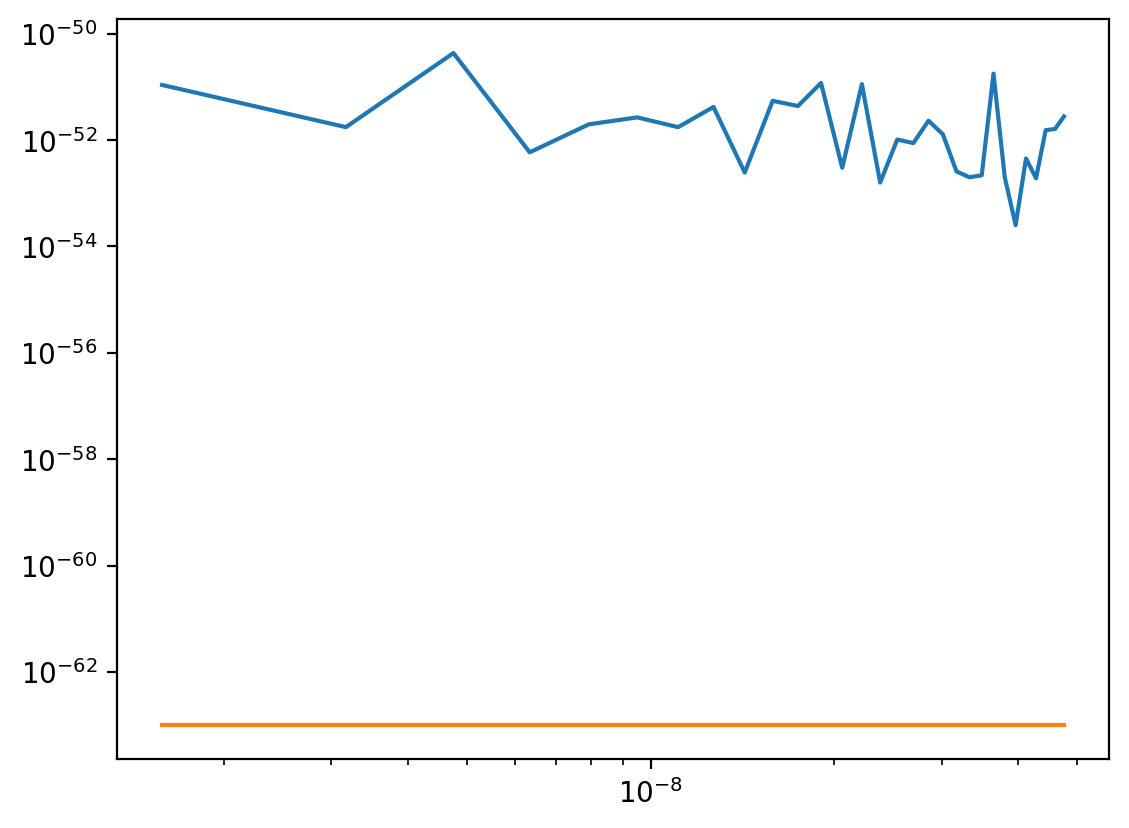

In [198]:
var_hc2 = np.var(hc2_binned, axis=1)
plt.loglog(bmid, var_hc2)
plt.loglog(bmid, 1e-63*np.ones(30))

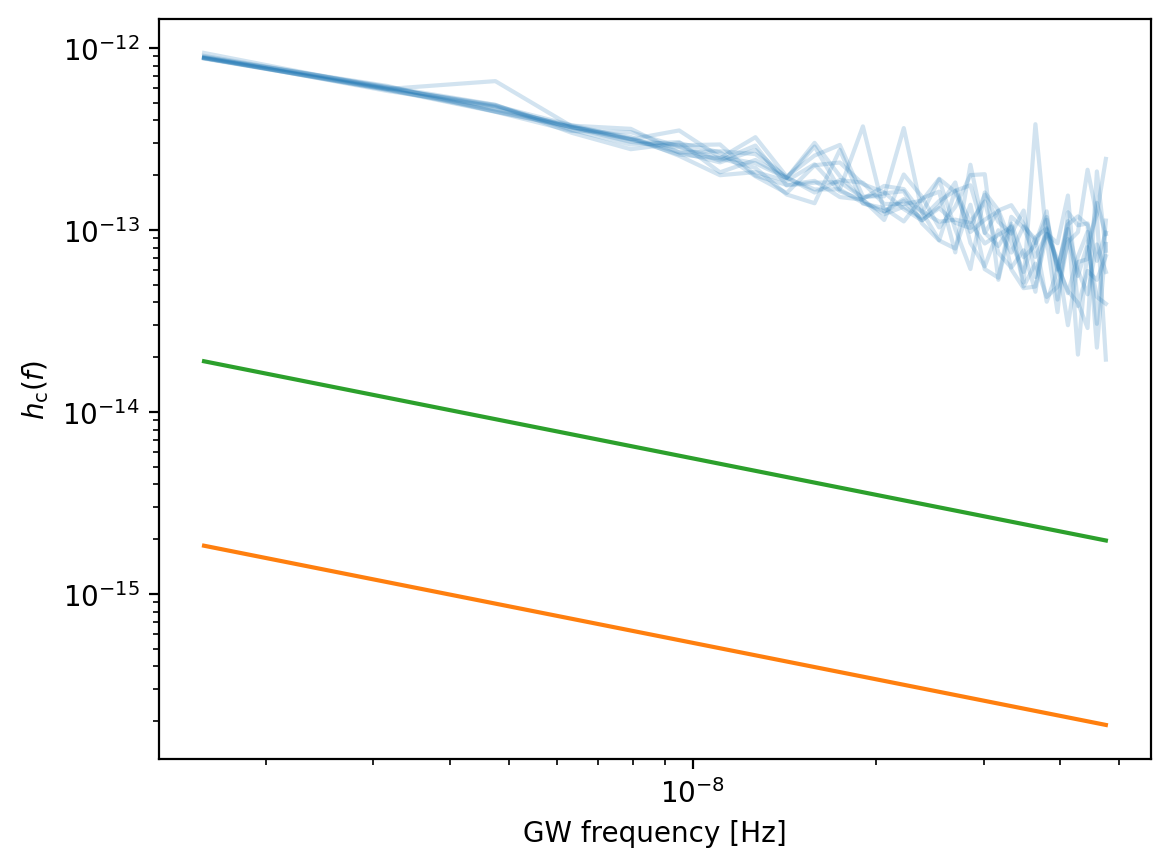

In [199]:
# Plot h_c for all realizations
fyr = 1 / 365.24 / 86400.0

for jj in range(nreal): #dN.shape[1]):
  #plt.loglog(bmid, A*dN[:, jj]*np.log(10), alpha=0.2, color='C0')
  plt.loglog(bmid, np.sqrt(hc2_binned[:, jj]), alpha=0.2, color='C0')
plt.loglog(bmid, 2.5e-16 * (bmid/fyr)**(-2/3.), color='C1')
plt.loglog(bmid, np.sqrt(gwb_ideal), color='C2')

plt.xlabel('GW frequency [Hz]');
plt.ylabel(r'$h_\mathrm{c}(f)$');
plt.show()
plt.close();

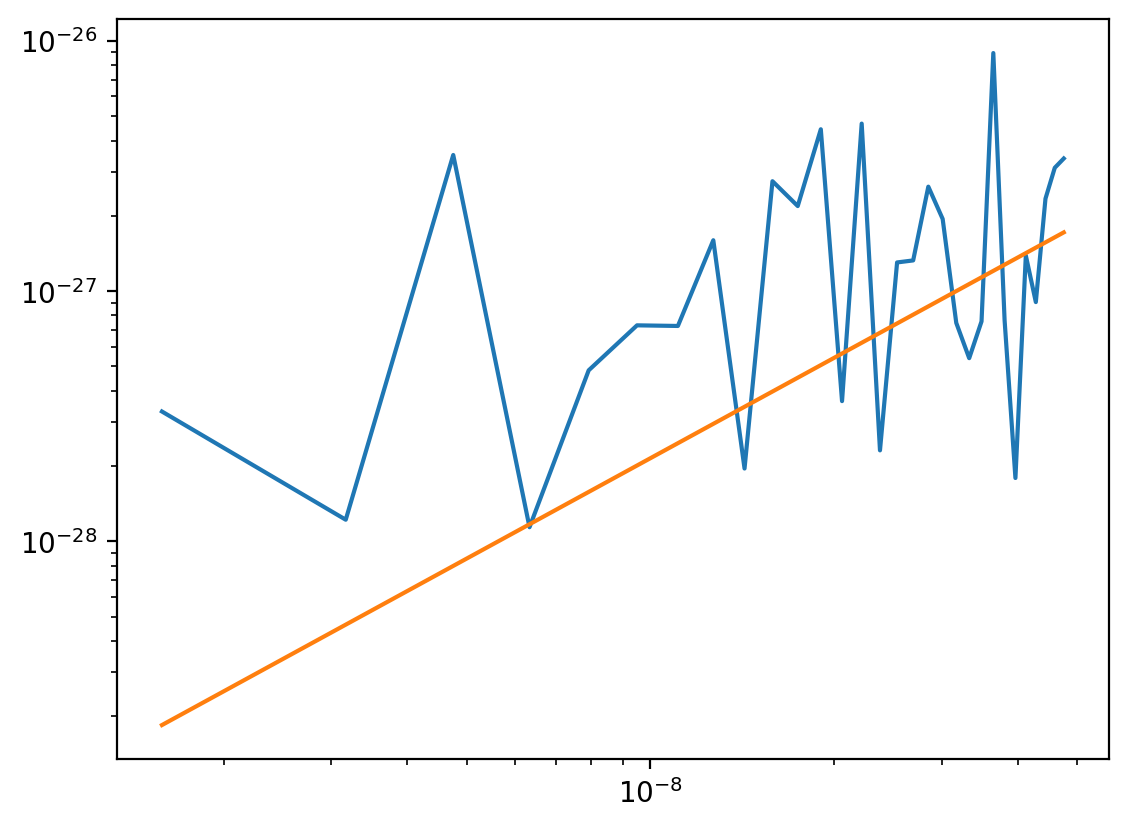

In [200]:
var_hc = np.var(np.sqrt(hc2_binned), axis=1)
plt.loglog(bmid, var_hc)
plt.loglog(bmid, 1e-27*(bmid/fyr)**(4/3))

/var/folders/n5/tlyhfd1j5s7gm9fxj02byc0c0000gn/T/ipykernel_18428/938657429.py:2: RuntimeWarning: divide by zero encountered in log10
  [plt.step(log10_mc_mid, 0.5*np.log10(log10_mc_binned[:, ii]), alpha=0.1, c='C0',


(-17.0, -11.934646988247977)

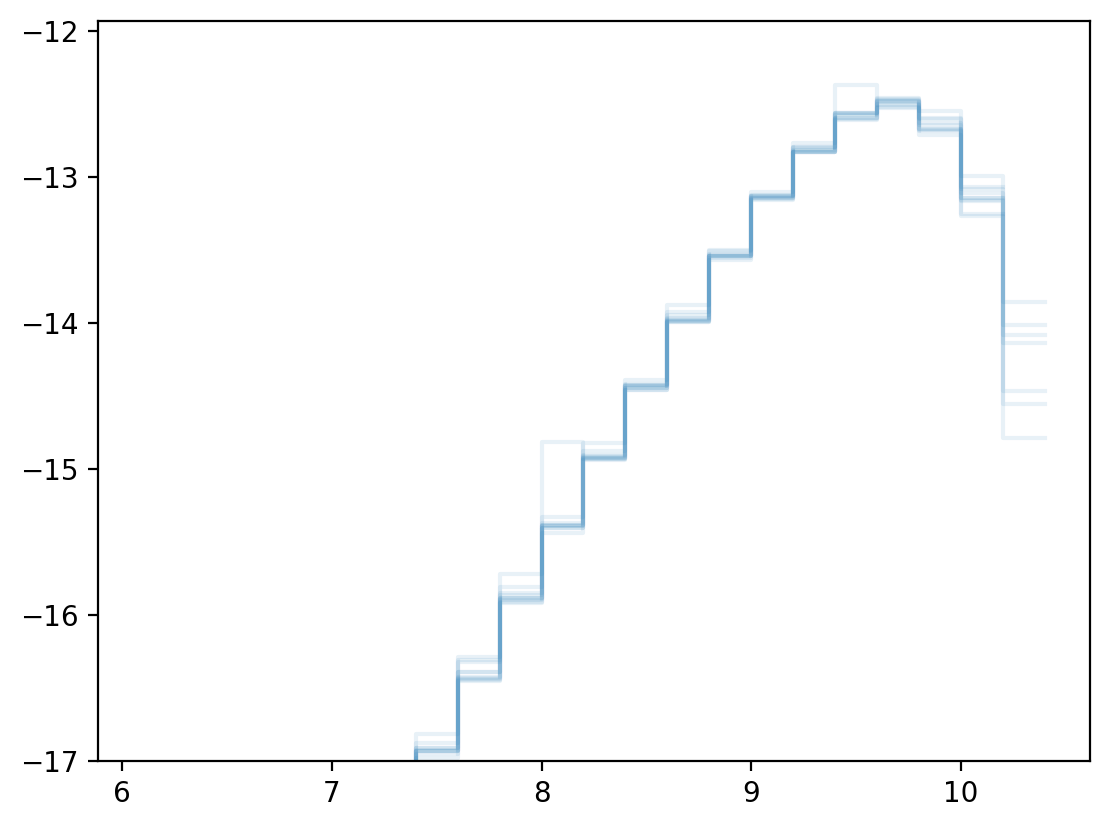

# Retry idealised background

In [11]:
G = 4.517103 * 10**-48  # Mpc3 / Msun s2
c = 9.7156119 * 10**-15  # Mpc / s

# define models
# MODEL 1
model1 = dict(alpha=1, log10_M_star=np.log10(3.2*10**7), beta=3, z0=3, n0_dot=2e-2)
model2 = dict(alpha=0.5, log10_M_star=np.log10(7.5*10**7), beta=2.5, z0=2.4, n0_dot=9.5e-3)
model3 = dict(alpha=0., log10_M_star=np.log10(1.8*10**8), beta=2, z0=1.8, n0_dot=1.5e-3)
model4 = dict(alpha=-0.5, log10_M_star=np.log10(4.2*10**8), beta=1.5, z0=1.1, n0_dot=9e-5)
model5 = dict(alpha=-1, log10_M_star=9., beta=1, z0=0.5, n0_dot=2e-6)
#model5 = dict(alpha=-1, log10_M_star=11., beta=1, z0=5, n0_dot=2.5e-11)

In [12]:
def dn_dlog10Mdz(log10_M, z, alpha, log10_M_star, beta, z0, n0_dot):
    """
        SMBHB number density per unit log10_M and unit redshift

        Parameters
        ----------
        z : float
            Redshift
        log10_M : float
            log10 of the chirp mass
        alpha : float
            Slope of the mass function
        log10_M_star : float
            Characteristic mass of the mass function
        beta : float
            Slope of the redshift function
        z0 : float
            Characteristic redshift of the redshift function
        n0_dot : float
            Normalization of the number density

        Returns
        -------
        float
            log10 SMBHB number density per unit log10_M and unit redshift
    """

    cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

    # transform number density normalisation to the right units
    n0_dot *= u.Mpc**-3 * u.Gyr**-1
    n0_dot = n0_dot.to(1/(u.s * u.Mpc**3)).value

    log10M_dist = 10**-(alpha*(log10_M - 7.) +
                        10**(log10_M - log10_M_star) * np.log10(np.e))
    
    z_dist = (1+z)**beta * np.exp(-z/z0)

    # change in age of binary per unit redshift
    dt_dz = 1/((1+z) * cosmo.H(z).to('Mpc / Mpc s').value)

    return n0_dot * log10M_dist * z_dist * dt_dz



In [13]:
def gwb_ideal(f, log10_M, z, model_params):
    """
        Idealized GW characteristic strain squared

        Parameters
        ----------
        log10_M : float
            log10 of the chirp mass
        z : float
            Redshift
        model_params : dict
            Model parameters

        Returns
        -------
        log10_hc2 : float
            log10 of the idealized GW characteristic strain squared
    """
    log10_M_3d = log10_M[None, :, None]
    z_3d = z[None, None, :]

    dn = dn_dlog10Mdz(log10_M_3d, z_3d, **model_params)

    integrand = (1+z_3d)**(-1/3) * (10**log10_M_3d)**(5/3) * dn

    dlog10_M = log10_M[1] - log10_M[0]
    dz = z[1] - z[0]
    integral = ((integrand[:, 1:, 1:] + integrand[:, :-1, :-1]) * dlog10_M * dz / 4).sum(axis=(1,2))
    
    prefact = 4*G**(5/3) / (3 * np.pi**(1/3) * c**2 * f**(4/3))
    
    return prefact * integral

In [14]:
Tspan = 20 * 365.24 * 86400
f = np.arange(1, 31)/Tspan

#M = np.linspace(10**6, 10**11, 1000)
log10_M = np.linspace(6, 11, 1001)
z = np.linspace(0, 5, 101)

hc2_ideal = gwb_ideal(f, log10_M, z, model3)

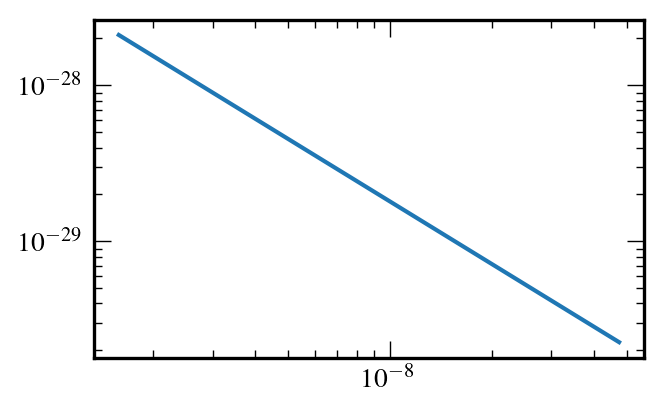

In [15]:
plt.plot(f, hc2_ideal)
plt.xscale('log', base=10)
plt.yscale('log', base=10)

# Poisson!

In [16]:
G = 4.517103 * 10**-48  # Mpc3 / Msun s2
c = 9.7156119 * 10**-15  # Mpc / s

In [17]:
def hc2_f(f, M, z):
    """
    """
    cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
    dL2 = cosmo.comoving_distance(z).to(u.Mpc).value ** -2.
    fr = f * (1+z)
    hc2 = 32/5 * c**-8. * (G * M)**(10/3) * dL2 * (np.pi*fr)**(4/3)

    return hc2

In [48]:
def dN_dlog10Mdzdlogf(f, M, z, model_params, return_int=True, mass_limit=True):
    """
    Assuming M and z are the edges of bins
    """
    f_3d = 0.5*(f[1:] + f[:-1])[:, None, None]
    M_3d = M[None, :, None]
    #log10_M_3d = np.log10(M)[None, :, None]
    z_3d = z[None, None, :]

    dlogf = (np.log(f[1:]) - np.log(f[:-1]))[:, None, None]
    #df = f[0]
    dlog10_M = (np.log10(M[1:]) - np.log10(M[:-1]))[None, :, None]
    dz = z[1] - z[0]

    #d2n = dn_dlog10Mdz(np.log10(M_3d), z_3d, **model_params) / (M_3d * np.log(10))
    d2n = dn_dlog10Mdz(np.log10(M_3d), z_3d, **model_params)

    fr = f_3d * (1+z_3d)
    dt_dlogfr = (5/96) * (G*M_3d/c**3)**(-5/3) * (np.pi * fr)**(-8/3)

    cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
    dA2 = cosmo.comoving_distance(z_3d).to('Mpc').value ** 2.
    cosmofact = 4 * np.pi * c * (1+z_3d) * dA2

    dN_ = d2n * dt_dlogfr * cosmofact

    if mass_limit:
        dN_log10M = dN.sum(axis=2)
        cumtrapz = np.cumsum(dN_log10M[:, ::-1], axis=1)[:, ::-1]
        
        for ii in range(f.shape[0]-1):
            mask = cumtrapz[ii] < 1
            dN[ii, mask] = 0

    if return_int:
        dN = (dN_[:, 1:, 1:] + dN_[:, :-1, :-1]) * dlog10_M * dz / 4
        dN *= dlogf
    else:
        dN = dN_

    #return np.rint(dN).astype(int)
    return dN


In [49]:
Tspan = 20 * 365.24 * 86400
fbins = (np.arange(1, 32) - 0.5)/Tspan

In [50]:
z_bins = np.linspace(0, 5, 101)
#M_bins = np.linspace(10**6, 10**11, 1001)
log10_M_bins = np.linspace(6, 11, 1001)

#dM = M_bins[1] - M_bins[0]
#dz = z_bins[1] - z_bins[0]
#dlogf = np.log(fbins[1:]) - np.log(fbins[:-1])

f_mid = 0.5 * (fbins[1:] + fbins[:-1])
#M_mid = 0.5 * (M_bins[1:] + M_bins[:-1])
log10_M_mid = 0.5 * (log10_M_bins[1:] + log10_M_bins[:-1])
z_mid = 0.5 * (z_bins[1:] + z_bins[:-1])

In [51]:
N = dN_dlog10Mdzdlogf(fbins, 10**log10_M_bins, z_bins, model4, mass_limit=False)

In [52]:
N.shape

(30, 1000, 100)

In [53]:
N.sum()

1045194662.0414128

In [54]:
nreal = 100000
dlogf = (np.log(fbins[1:]) - np.log(fbins[:-1]))

rng = np.random.default_rng()
h2cf = np.zeros((nreal, 30))
for nreal in range(nreal):
    s = rng.poisson(lam=N, size=(30, 1000, 100))
    h2 = hc2_f(f_mid[:, None, None],
               10**log10_M_mid[None, :, None],
               z_mid[None, None, :])
    h2cf[nreal, :] = (s * h2).sum(axis=(-2,-1)) / dlogf

In [55]:
#np.save('./data/hc2f_10k_model4', h2cf)
#np.save('./data/var_hc2f_10k_model4', var_h2cf)

#h2cf = np.load('./data/hc2f_10k_model4.npy')
#var_h2cf = np.load('./data/var_hc2f_10k.npy')

In [82]:
# bootstrap!
vars = np.zeros((100000, 30))
for ii in range(100000):
    idxs = np.random.choice(100000, 100000, replace=True)
    vars[ii] = np.var(h2cf[idxs], axis=0)

Text(0.5, 0, 'GW Frequency (Hz)')

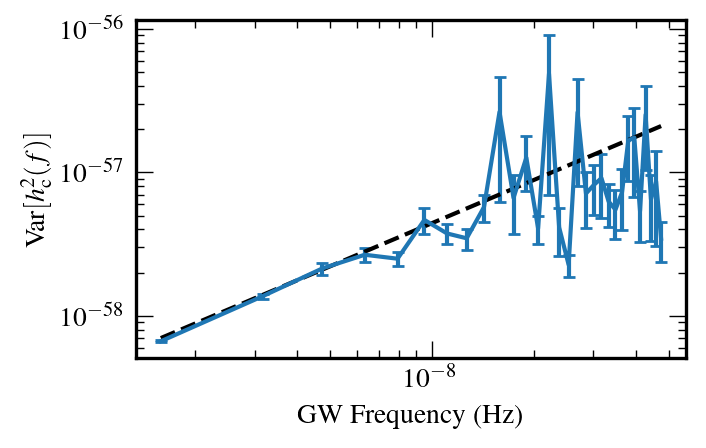

In [80]:
figsize_params = {"figure.figsize": [3.5503666805036667, 2.1942472810764047]}
plt.rcParams.update(figsize_params)

var = np.var(h2cf, axis=0)
plt.errorbar(f_mid, var, yerr=np.std(vars, axis=0), label='Realisations',
             capsize=2)
plt.plot(f_mid, 1.4e-57 * (f_mid/fyr)**(1), c='k', ls='--', label=r'$f^1$')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.ylabel(r'$\mathrm{Var}[h_\mathrm{c}^2(f)]$')
plt.xlabel(r'GW Frequency (Hz)')

Text(0.5, 0, 'GW Frequency (Hz)')

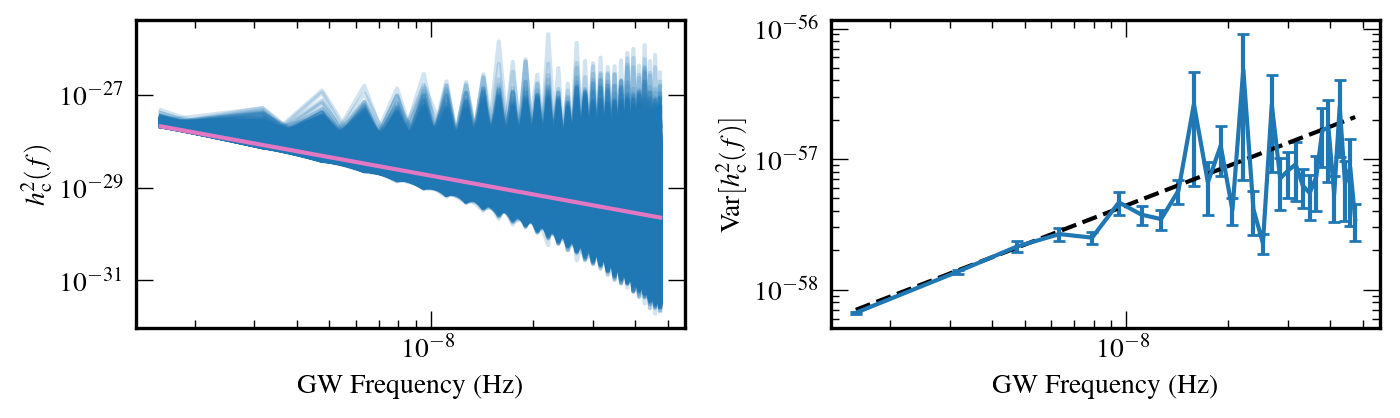

In [81]:
figsize_params = {"figure.figsize": [3.5503666805036667*2, 2.1942472810764047]}
plt.rcParams.update(figsize_params)

fig, axs = plt.subplots(ncols=2, tight_layout=True)
fyr = 1/(365.24*86400)

ax = axs[0]
ax.plot(f_mid, h2cf[0], c='C0', alpha=0.2, rasterized=True, label='GWB realisations')
[ax.plot(f_mid, h2cf[ii], c='C0', alpha=0.2, rasterized=True) for ii in range(1, nreal)]
#ax.plot(f_mid, np.mean(h2cf, axis=0), c='C1')
ax.plot(f_mid, hc2_ideal, c='C6', rasterized=True, label='Phinney 2001')
#4ax.plot(f_mid, 5e-30*(f_mid/fyr)**(-4/3), c='r')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$h_\mathrm{c}^2(f)$')
ax.set_xlabel(r'GW Frequency (Hz)')

ax = axs[1]
var = np.var(h2cf, axis=0)
ax.errorbar(f_mid, var, yerr=np.std(vars, axis=0), label='Realisations',
             capsize=2)
ax.plot(f_mid, 1.4e-57 * (f_mid/fyr)**(1), c='k', ls='--', label=r'$f^1$')
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
ax.set_ylabel(r'$\mathrm{Var}[h_\mathrm{c}^2(f)]$')
ax.set_xlabel(r'GW Frequency (Hz)')

#fig.savefig('./notebooks/figures/h2cf_10k.pdf', dpi=300);

Text(0.5, 0, 'GW Frequency (Hz)')

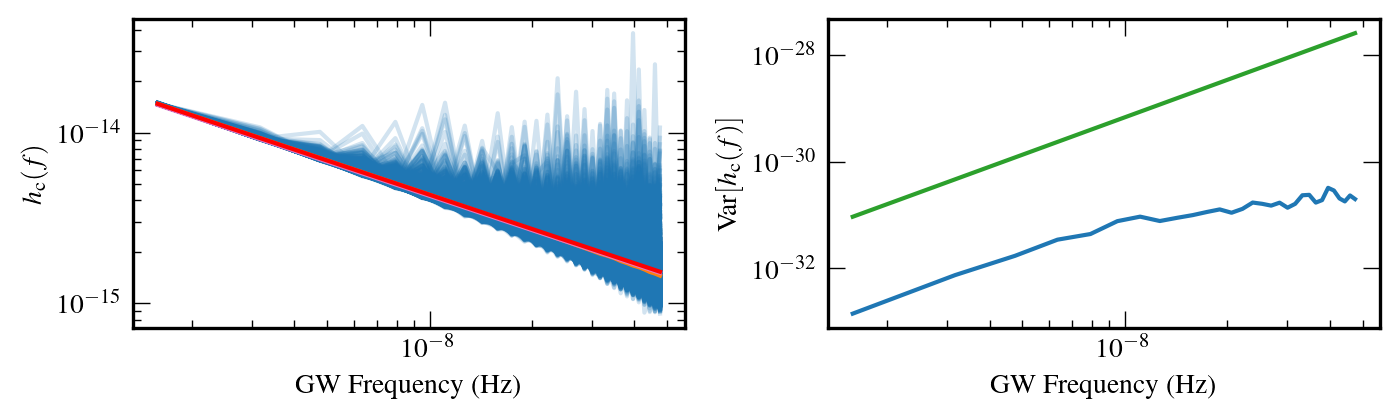

In [31]:
figsize_params = {"figure.figsize": [3.5503666805036667*2, 2.1942472810764047]}
plt.rcParams.update(figsize_params)

fig, axs = plt.subplots(ncols=2, tight_layout=True)
fyr = 1/(365.24*86400)

ax = axs[0]
ax.plot(f_mid, np.sqrt(h2cf[0]), c='C0', alpha=0.2, rasterized=True, label='GWB realisations')
[ax.plot(f_mid, np.sqrt(h2cf[ii]), c='C0', alpha=0.2, rasterized=True) for ii in range(1, nreal)]
ax.plot(f_mid, np.mean(np.sqrt(h2cf), axis=0), c='C1')
ax.plot(f_mid, np.sqrt(hc2_ideal), c='C6', rasterized=True, label='Phinney 2001')
ax.plot(f_mid, 2e-15*(f_mid/fyr)**(-2/3), c='r')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$h_\mathrm{c}(f)$')
ax.set_xlabel(r'GW Frequency (Hz)')

ax = axs[1]
var = np.var(np.sqrt(h2cf), axis=0)
plt.plot(f_mid, var, label='Realisations')
#[plt.plot(f_mid/fyr, var_h2cf[ii], c='C1', alpha=0.2) for ii in range(nreal)]
ax.plot(f_mid, 1e-28 * (f_mid/fyr)**(7/3), c='C2', label=r'$f^0$')
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
ax.set_ylabel(r'$\mathrm{Var}[h_\mathrm{c}(f)]$')
ax.set_xlabel(r'GW Frequency (Hz)')

#fig.savefig('./notebooks/figures/h2cf_10k.pdf', dpi=300);

In [32]:
plt.close('all')

In [29]:
plt.plot(f, N.sum(axis=(-2, -1)))
plt.plot(f, 1e9*(f/fyr)**-(11/3))
plt.plot(f, 1e9*(f/fyr)**-(8/3))
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.show()


NameError: name 'N' is not defined

In [ ]:
H0 = 70 * u.km/u.s/u.Mpc
H0 = H0.to(1/u.s).value

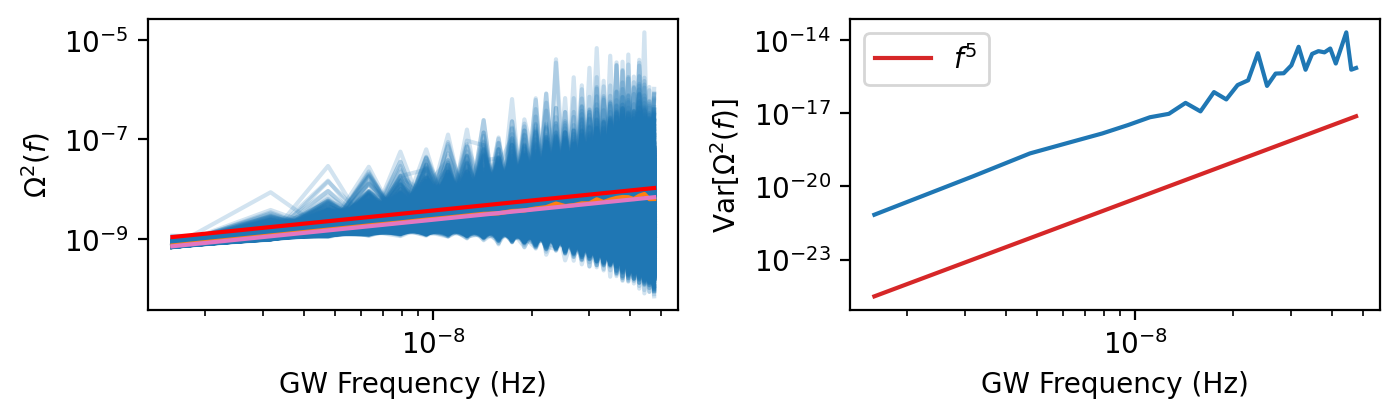

In [ ]:
figsize_params = {"figure.figsize": [3.5503666805036667*2, 2.1942472810764047]}
plt.rcParams.update(figsize_params)

fig, axs = plt.subplots(ncols=2, tight_layout=True)
fyr = 1/(365.24*86400)

omega = (2*np.pi**2)/(3*H0**2) * f_mid[None, :]**2 * h2cf

ax = axs[0]
ax.plot(f_mid, omega[0], c='C0', alpha=0.2, rasterized=True, label='GWB realisations')
[ax.plot(f_mid, omega[ii], c='C0', alpha=0.2, rasterized=True) for ii in range(1, nreal)]
ax.plot(f_mid, np.mean(omega, axis=0), c='C1')
ax.plot(f_mid, (2*np.pi**2)/(3*H0**2) * f_mid**2 * hc2_ideal, c='C6', rasterized=True, label='Phinney 2001')
ax.plot(f_mid, 8e-9*(f_mid/fyr)**(2/3), c='r')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$\Omega^2(f)$')
ax.set_xlabel(r'GW Frequency (Hz)')

ax = axs[1]
var = np.var(omega, axis=0)
plt.plot(f_mid, var)  #, label='Realisations')
#[plt.plot(f_mid/fyr, var_h2cf[ii], c='C1', alpha=0.2) for ii in range(nreal)]
#ax.plot(f_mid, 1e-15 * (f_mid/fyr)**(12/3), c='C2', label=r'$f^4$')
ax.plot(f_mid, 1e-18 * (f_mid/fyr)**(15/3), c='C3', label=r'$f^5$')
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
ax.set_ylabel(r'$\mathrm{Var}[\Omega^2(f)]$')
ax.set_xlabel(r'GW Frequency (Hz)')
ax.legend()

#fig.savefig('./notebooks/figures/h2cf_10k.pdf', dpi=300);

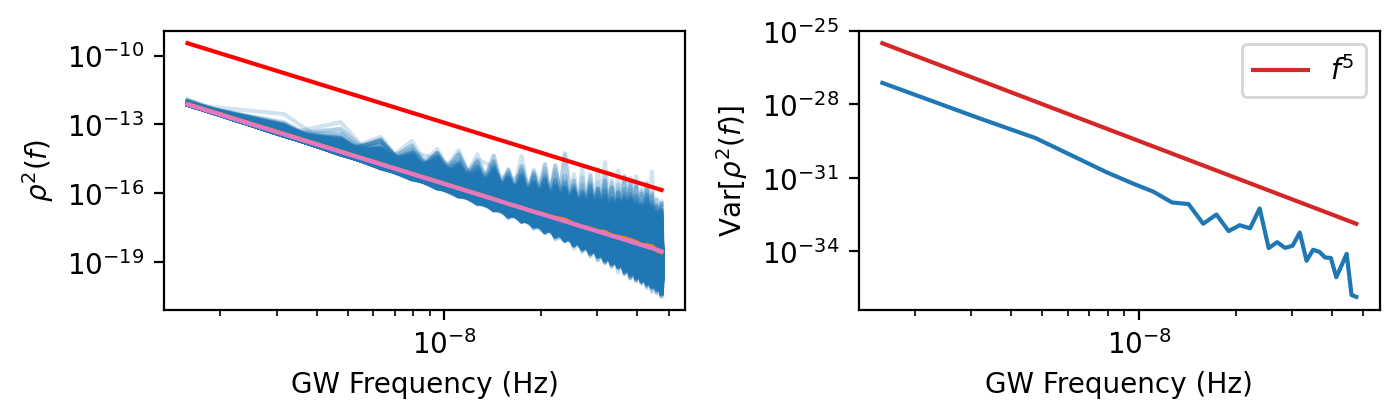

In [ ]:
figsize_params = {"figure.figsize": [3.5503666805036667*2, 2.1942472810764047]}
plt.rcParams.update(figsize_params)

fig, axs = plt.subplots(ncols=2, tight_layout=True)
fyr = 1/(365.24*86400)

rho2 = h2cf / (12 * np.pi**2 * f_mid[None, :]**3 * Tspan)

ax = axs[0]
ax.plot(f_mid, rho2[0], c='C0', alpha=0.2, rasterized=True, label='GWB realisations')
[ax.plot(f_mid, rho2[ii], c='C0', alpha=0.2, rasterized=True) for ii in range(1, nreal)]
ax.plot(f_mid, np.mean(rho2, axis=0), c='C1')
ax.plot(f_mid, hc2_ideal / (12 * np.pi**2 * f_mid**3 * Tspan), c='C6', rasterized=True, label='Phinney 2001')
ax.plot(f_mid, 8e-16*(f_mid/fyr)**(-13/3), c='r')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$\rho^2(f)$')
ax.set_xlabel(r'GW Frequency (Hz)')

ax = axs[1]
var = np.var(rho2, axis=0)
plt.plot(f_mid, var)  #, label='Realisations')
#[plt.plot(f_mid/fyr, var_h2cf[ii], c='C1', alpha=0.2) for ii in range(nreal)]
#ax.plot(f_mid, 1e-15 * (f_mid/fyr)**(12/3), c='C2', label=r'$f^4$')
ax.plot(f_mid, 1e-32 * (f_mid/fyr)**(-15/3), c='C3', label=r'$f^5$')
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
ax.set_ylabel(r'$\mathrm{Var}[\rho^2(f)]$')
ax.set_xlabel(r'GW Frequency (Hz)')
ax.legend()

#fig.savefig('./notebooks/figures/h2cf_10k.pdf', dpi=300);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


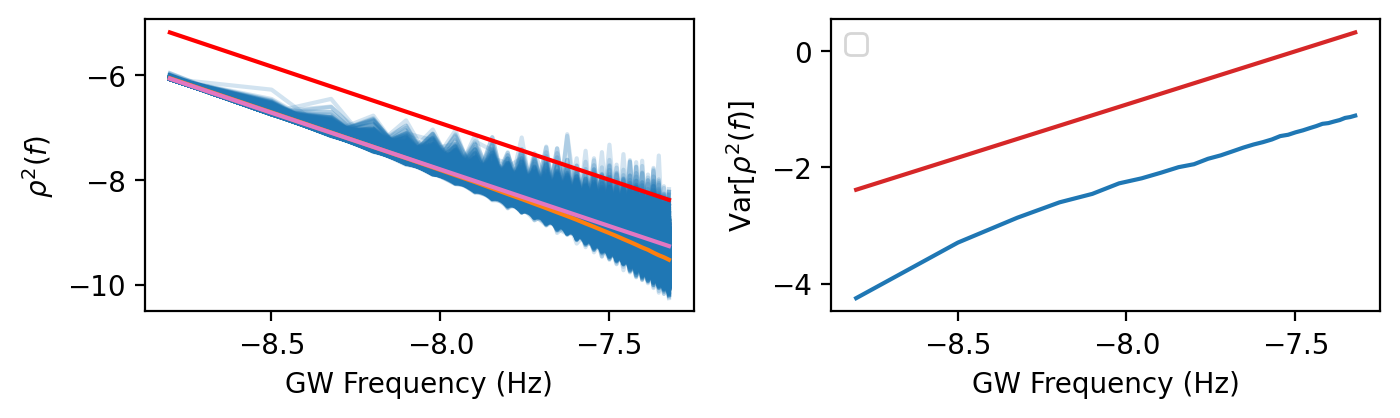

In [ ]:
figsize_params = {"figure.figsize": [3.5503666805036667*2, 2.1942472810764047]}
plt.rcParams.update(figsize_params)

fig, axs = plt.subplots(ncols=2, tight_layout=True)
fyr = 1/(365.24*86400)

rho2 = h2cf / (12 * np.pi**2 * f_mid[None, :]**3 * Tspan)
log10_rho = 0.5 * np.log10(rho2)

ax = axs[0]
ax.plot(np.log10(f_mid), log10_rho[0], c='C0', alpha=0.2, rasterized=True, label='GWB realisations')
[ax.plot(np.log10(f_mid), log10_rho[ii], c='C0', alpha=0.2, rasterized=True) for ii in range(1, nreal)]
ax.plot(np.log10(f_mid), np.mean(log10_rho, axis=0), c='C1')
ax.plot(np.log10(f_mid), 0.5*np.log10(hc2_ideal / (12 * np.pi**2 * f_mid**3 * Tspan)), c='C6', rasterized=True, label='Phinney 2001')
ax.plot(np.log10(f_mid), -8 - (13/6)*np.log10(f_mid/fyr), c='r')
ax.set_ylabel(r'$\rho^2(f)$')
ax.set_xlabel(r'GW Frequency (Hz)')

ax = axs[1]
var = np.var(log10_rho, axis=0)
plt.plot(np.log10(f_mid), np.log10(var))  #, label='Realisations')
#[plt.plot(f_mid/fyr, var_h2cf[ii], c='C1', alpha=0.2) for ii in range(nreal)]
#ax.plot(f_mid, 1e-15 * (f_mid/fyr)**(12/3), c='C2', label=r'$f^4$')
ax.plot(np.log10(f_mid), 1e-33 + 11/6 * np.log10(f_mid/fyr), c='C3')
ax.set_ylabel(r'$\mathrm{Var}[\rho^2(f)]$')
ax.set_xlabel(r'GW Frequency (Hz)')
ax.legend()

#fig.savefig('./notebooks/figures/h2cf_10k.pdf', dpi=300);

### checking first freq

In [293]:
nreal = 100
dlogf = (np.log(fbins[1:]) - np.log(fbins[:-1]))
fidx = 0

rng = np.random.default_rng()
h2cf_f0 = np.zeros((nreal, 1000, 100))
#var_h2cf 
# = np.zeros((nreal, 1))
for nreal in range(nreal):
    s = rng.poisson(lam=N[fidx, :], size=(1000, 100))
    h2 = hc2_f(f_mid[fidx],
               10**log10_M_mid[:, None],
               z_mid[None, :])
    h2cf_f0[nreal, :] = s * h2 / dlogf[fidx]

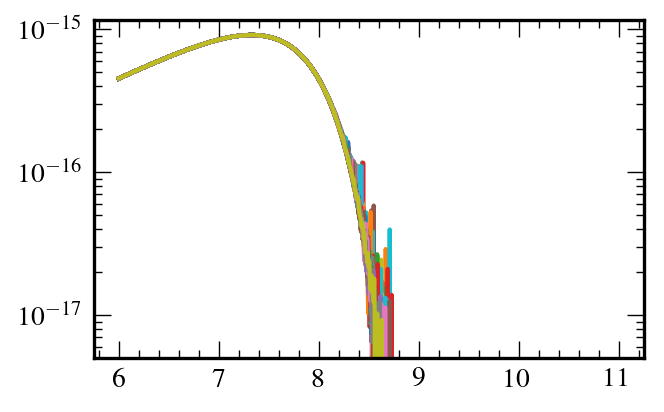

In [294]:
[plt.plot(log10_M_mid, np.sqrt(h2cf_f0[ii].sum(axis=-1))) for ii in range(nreal)]
#plt.xscale('log', base=10)
plt.yscale('log', base=10)

(1e-17, 5e-15)

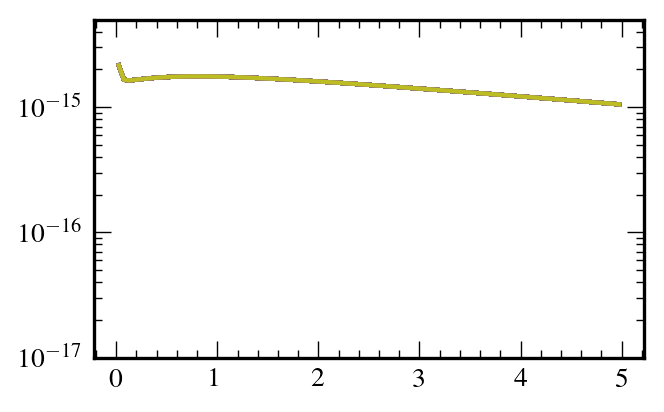

In [295]:
[plt.plot(z_mid, np.sqrt(h2cf_f0[ii].sum(axis=-2))) for ii in range(nreal)]
#plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.ylim(1e-17, 5e-15)

### sum across frequencies

In [296]:
nreal = 100
dlogf = (np.log(fbins[1:]) - np.log(fbins[:-1]))

rng = np.random.default_rng()
h2cf_fsum = np.zeros((nreal, 1000, 100))
#var_h2cf 
# = np.zeros((nreal, 1))
for nreal in range(nreal):
    s = rng.poisson(lam=N, size=(100, 1000, 100))
    h2 = hc2_f(f_mid[:, None, None],
               10**log10_M_mid[None, :, None],
               z_mid[None, None, :])
    h2cf_fsum[nreal, :] = (s * h2 / dlogf).sum(axis=0)

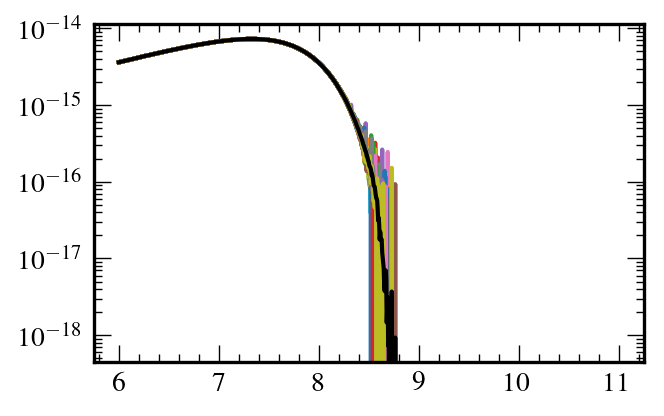

In [297]:
[plt.plot(log10_M_mid, np.sqrt(h2cf_fsum[ii].sum(axis=-1))) for ii in range(nreal)]
plt.plot(log10_M_mid, np.mean(np.sqrt(h2cf_fsum.sum(axis=-1)), axis=0), c='k')
#plt.xscale('log', base=10)
plt.yscale('log', base=10)

(1e-17, 5e-14)

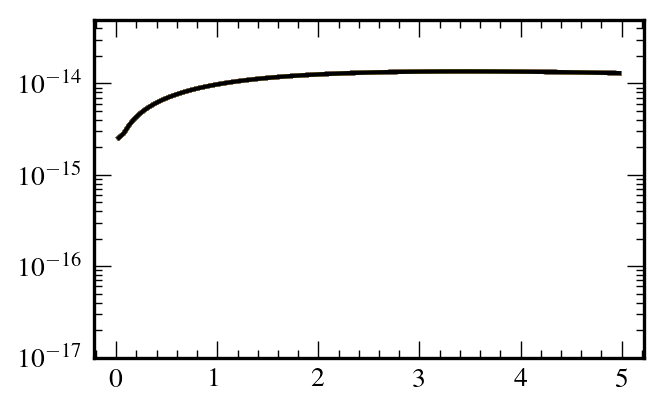

In [298]:
[plt.plot(z_mid, np.sqrt(h2cf_fsum[ii].sum(axis=-2))) for ii in range(nreal)]
plt.plot(z_mid, np.mean(np.sqrt(h2cf_fsum.sum(axis=-2)), axis=0), c='k')
#plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.ylim(1e-17, 5e-14)

In [299]:
plt.close('all')

## for a single bin of mass, redshift

In [127]:
Tspan = 20 * 365.24 * 86400
fbins = (np.arange(1, 32) - 0.5)/Tspan

log10_M_bins = np.array([6, 6.05])
z_bins = np.array([3, 3.05])

N = dN_dlog10Mdzdlogf(fbins, 10**log10_M_bins, z_bins, model3, mass_limit=False)

In [128]:
fmid = 0.5 * (fbins[1:] + fbins[:-1])

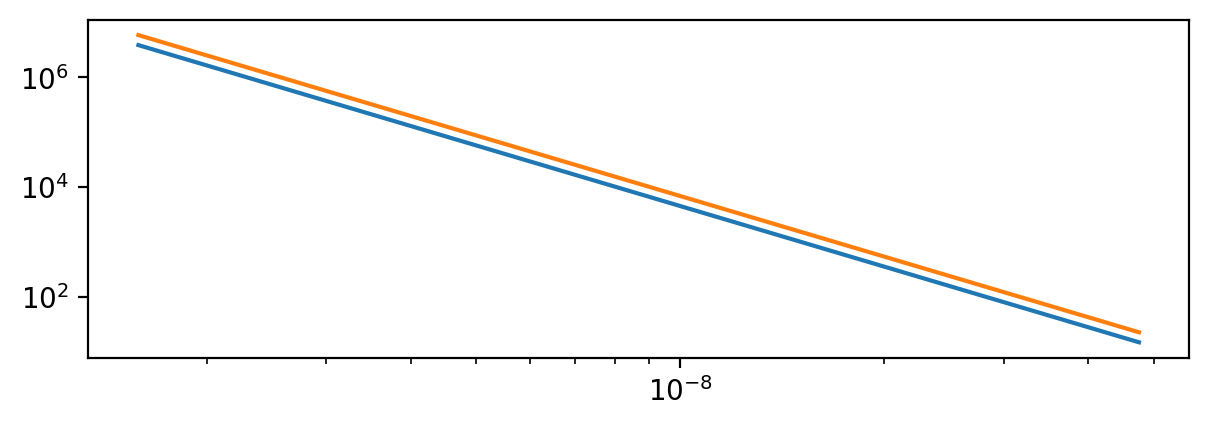

In [136]:
plt.loglog(fmid, N.flatten())
plt.loglog(fmid, 1e2*(fmid/fyr)**(-11/3))

In [140]:
nreal = 10000
dlogf = (np.log(fbins[1:]) - np.log(fbins[:-1]))

rng = np.random.default_rng()
h2cf = np.zeros((nreal, 30))
# = np.zeros((nreal, 1))
for nreal in range(nreal):
    s = rng.poisson(lam=N.flatten(), size=30)
    h2 = hc2_f(f_mid, 10**np.mean(log10_M_bins), np.mean(z_bins))
    h2cf[nreal, :] = s * h2 * f_mid / df  #* f_mid / df  #/ dlogf

Text(0.5, 0, 'GW Frequency (Hz)')

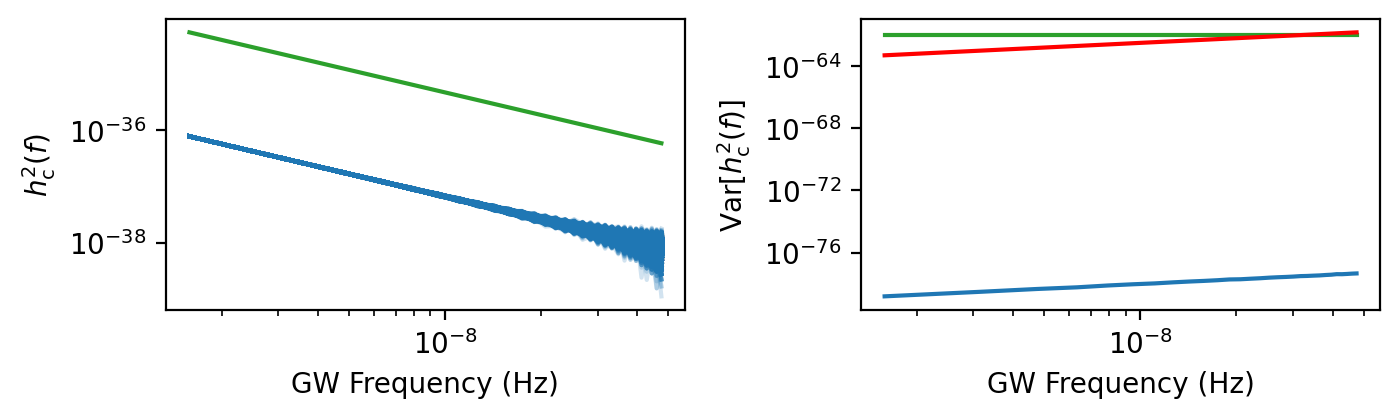

In [141]:
figsize_params = {"figure.figsize": [3.5503666805036667*2, 2.1942472810764047]}
plt.rcParams.update(figsize_params)

fig, axs = plt.subplots(ncols=2, tight_layout=True)
fyr = 1/(365.24*86400)

ax = axs[0]
ax.plot(f_mid, h2cf[0], c='C0', alpha=0.2, rasterized=True, label='GWB realisations')
[ax.plot(f_mid, h2cf[ii], c='C0', alpha=0.2, rasterized=True) for ii in range(1, nreal)]
#ax.plot(f_mid, np.mean(h2cf, axis=0), c='C0')
#ax.plot(f_mid, hc2_ideal, c='C6', rasterized=True, label='Phinney 2001')
ax.plot(f_mid, 1e-36*(f_mid/fyr)**(-4/3), c='C2')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$h_\mathrm{c}^2(f)$')
ax.set_xlabel(r'GW Frequency (Hz)')

ax = axs[1]
var = np.var(h2cf, axis=0)
ax.plot(f_mid, var, label='Realisations')
#[plt.plot(f_mid/fyr, var_h2cf[ii], c='C1', alpha=0.2) for ii in range(nreal)]
ax.plot(f_mid, 1e-62 * (f_mid/fyr)**(0), c='C2', label=r'$f^0$')
ax.plot(f_mid, 1e-62 * (f_mid/fyr)**(3/3), c='r', label=r'$f^0$')
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
ax.set_ylabel(r'$\mathrm{Var}[h_\mathrm{c}^2(f)]$')
ax.set_xlabel(r'GW Frequency (Hz)')

#fig.savefig('./notebooks/figures/h2cf_10k.pdf', dpi=300);

# sample from dN/d... like top of this notebook

In [248]:
Tspan = 20 * 365.24 * 86400
fbins = np.linspace(1/Tspan, 30/Tspan, 1001)

z_bins = np.array([0.5, 0.55])  #np.linspace(0, 5, 101)  #   
log10_M_bins = np.array([6, 6.05])  #np.linspace(6, 11, 1001)  #  

f_mid = 0.5 * (fbins[1:] + fbins[:-1])
log10_M_mid = 0.5 * (log10_M_bins[1:] + log10_M_bins[:-1])
z_mid = 0.5 * (z_bins[1:] + z_bins[:-1])

N = dN_dlog10Mdzdlogf(fbins, 10**log10_M_bins, z_bins, model5, mass_limit=False)

In [249]:
N.shape

(1000, 1, 1)

In [250]:
bins = (np.arange(1, 12) - 0.5)/Tspan
f_mid = np.arange(1, 11)/Tspan

In [251]:
from tqdm import tqdm

In [253]:
nreal = 10000

rng = np.random.default_rng()
h2cf = np.zeros((nreal, 10))

for ii, log10_M in tqdm(enumerate(log10_M_mid)):
    for jj, z in enumerate(z_mid):

        f_dist = rv_histogram((N[:, ii, jj], fbins))  # check if edges or on freqs

        for nreal in range(nreal):
            freqs = f_dist.rvs(size=np.rint(N[:, ii, jj].sum()).astype(int))
            mask = np.digitize(freqs, bins) - 1

            h2f = hc2_f(freqs, log10_M, z) * freqs

            for kk, bin in enumerate(f_mid):
                h2cf[nreal, kk] = np.sum(h2f[mask==kk]) * Tspan



0it [00:00, ?it/s]

1it [00:40, 40.44s/it]


Text(0.5, 0, 'GW Frequency (Hz)')

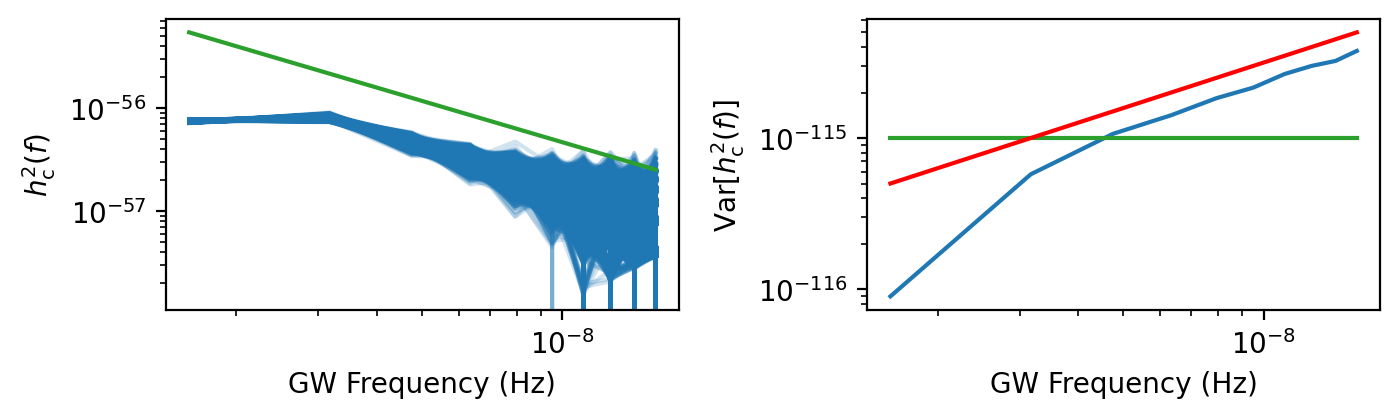

In [256]:
figsize_params = {"figure.figsize": [3.5503666805036667*2, 2.1942472810764047]}
plt.rcParams.update(figsize_params)

fig, axs = plt.subplots(ncols=2, tight_layout=True)
fyr = 1/(365.24*86400)

ax = axs[0]
ax.plot(f_mid, h2cf[0], c='C0', alpha=0.2, rasterized=True, label='GWB realisations')
[ax.plot(f_mid, h2cf[ii], c='C0', alpha=0.2, rasterized=True) for ii in range(1, nreal)]
#ax.plot(f_mid, np.mean(h2cf, axis=0), c='C0')
#ax.plot(f_mid, hc2_ideal, c='C6', rasterized=True, label='Phinney 2001')
ax.plot(f_mid, 1e-57*(f_mid/fyr)**(-4/3), c='C2')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$h_\mathrm{c}^2(f)$')
ax.set_xlabel(r'GW Frequency (Hz)')

ax = axs[1]
var = np.var(h2cf, axis=0)
ax.plot(f_mid, var, label='Realisations')
#[plt.plot(f_mid/fyr, var_h2cf[ii], c='C1', alpha=0.2) for ii in range(nreal)]
ax.plot(f_mid, 1e-115 * (f_mid/fyr)**(0), c='C2', label=r'$f^0$')
ax.plot(f_mid, 1e-114 * (f_mid/fyr)**(3/3), c='r', label=r'$f^0$')
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
ax.set_ylabel(r'$\mathrm{Var}[h_\mathrm{c}^2(f)]$')
ax.set_xlabel(r'GW Frequency (Hz)')

#fig.savefig('./notebooks/figures/h2cf_10k.pdf', dpi=300);